# Proyecto Integrador

In [30]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Avance 1  Carga y Transformación de los Datos

In [31]:
# Leer el archivo CSV 
df = pd.read_csv('data_latinoamerica.csv')

In [32]:
#Visualizar la dada:
df
#df.head(10)

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

In [33]:
# Verificar las dimensiones del dataset
print(f"Registros: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

Registros: 12216057
Columnas: 50


In [34]:
# Contar valores únicos por país
df.value_counts("country_name")

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Ecuador                 24775
Venezuela               24775
Guatemala               22793
Uruguay                 19820
Paraguay                18829
Honduras                18829
Cuba                    17838
Nicaragua               17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

In [35]:
# Verificar los nombres de las columnas
print(df.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [36]:
# Filtrar los datos por países de interés
paises=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=df[df['country_name'].isin(paises)]

#Hay datos repetidos, es mejor hacerlo con location_key 

In [37]:
# Verificar la cantidad de registros después del filtro
print(f"Registros después del filtro de países: {np.shape(data_latinoamerica)}")


Registros después del filtro de países: (11970289, 50)


In [38]:
# Verificar valores faltantes
print(data_latinoamerica.isnull().sum())


location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [39]:
# Realizar un filtro por columna "location_key"
localizacion_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO', 'MX', 'PE', 'BR'])]

# Ver los primeros registros del dataframe filtrado
print(localizacion_paises.head())


  location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                

In [40]:
# Asegúrate de que la columna de fecha esté en formato datetime
data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])

# Filtrar por fechas después del 1 de enero de 2021
localizacion_paises_fecha = localizacion_paises[localizacion_paises['date'] > '2021-01-01']


C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\1738585491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica['date'] = pd.to_datetime(data_latinoamerica['date'])


In [41]:
# Verificar la cantidad de nulos
valores_nulos_fecha=localizacion_paises_fecha.isnull().sum()[localizacion_paises_fecha.isnull().sum()>0]

print(valores_nulos_fecha)
print(np.shape(localizacion_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [42]:
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [43]:
#Promedio general
localizacion_paises_fecha.new_confirmed.mean()

np.float64(13936.279613215149)

In [44]:
#Promedio Colombia (filtro por pais COL)
localizacion_paises_fecha.loc[localizacion_paises_fecha['country_name']=='Colombia', 'new_confirmed'].mean()

np.float64(7407.414516129033)

In [45]:
#visualizar paises
for pais in paises:
    for columna in valores_nulos_fecha.index:
        print(pais, columna)

Argentina new_confirmed
Argentina new_deceased
Argentina cumulative_confirmed
Argentina cumulative_deceased
Argentina cumulative_vaccine_doses_administered
Argentina average_temperature_celsius
Argentina minimum_temperature_celsius
Argentina maximum_temperature_celsius
Argentina rainfall_mm
Argentina relative_humidity
Argentina new_recovered
Argentina cumulative_recovered
Chile new_confirmed
Chile new_deceased
Chile cumulative_confirmed
Chile cumulative_deceased
Chile cumulative_vaccine_doses_administered
Chile average_temperature_celsius
Chile minimum_temperature_celsius
Chile maximum_temperature_celsius
Chile rainfall_mm
Chile relative_humidity
Chile new_recovered
Chile cumulative_recovered
Colombia new_confirmed
Colombia new_deceased
Colombia cumulative_confirmed
Colombia cumulative_deceased
Colombia cumulative_vaccine_doses_administered
Colombia average_temperature_celsius
Colombia minimum_temperature_celsius
Colombia maximum_temperature_celsius
Colombia rainfall_mm
Colombia relati

In [46]:
# Iterar sobre cada país y columna con valores nulos
for pais in paises:
    for columna in valores_nulos_fecha.index:
        # Calcular la media de la columna para el país actual
        media_pais = localizacion_paises_fecha.loc[localizacion_paises_fecha['country_name'] == pais, columna].mean()
        
        # Rellenar los valores nulos con la media correspondiente
        localizacion_paises_fecha.loc[localizacion_paises_fecha['country_name'] == pais, columna] = \
            localizacion_paises_fecha.loc[localizacion_paises_fecha['country_name'] == pais, columna].fillna(media_pais)


In [47]:
#Promedio Colombia (filtro por pais COL)
round(localizacion_paises_fecha.loc[localizacion_paises_fecha['country_name']=='Colombia', 'new_confirmed'].mean())

7407

In [48]:
# Llenar todos los valores nulos en las columnas 'new_recovered' y 'cumulative_recovered' con 0
localizacion_paises_fecha['new_recovered'].fillna(0, inplace=True)
localizacion_paises_fecha['cumulative_recovered'].fillna(0, inplace=True)

# Verificar si todavía quedan nulos
print(localizacion_paises_fecha.isnull().sum())


location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3485045960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  localizacion_paises_fecha['new_recovered'].fillna(0, inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3485045960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  localizacion_paises_fecha['new_recovered'].filln

In [49]:
# Verificar nuevamente la cantidad de nulos
valores_nulos_fecha=localizacion_paises_fecha.isnull().sum()[localizacion_paises_fecha.isnull().sum()>0]

print(valores_nulos_fecha)
print(np.shape(localizacion_paises_fecha))

Series([], dtype: int64)
(3744, 50)


In [50]:
localizacion_paises_fecha.to_csv("DatosFinalesFiltrado.csv",index=False)

In [51]:
# Calcular estadísticas descriptivas
estadisticas_descriptivas = localizacion_paises_fecha.describe()

# Imprimir estadísticas descriptivas
print(estadisticas_descriptivas)

# Responder preguntas:
# ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
"""
Las métricas como la media, desviación estándar, mínimos y máximos ayudan a entender la tendencia central y la dispersión de los datos. 
Esto permite identificar posibles outliers, variaciones y patrones generales en los datos. Por ejemplo, el promedio de casos nuevos puede
indicar la gravedad del impacto del COVID-19 en cada país.
"""

# ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
"""
No, las estadísticas descriptivas solo se calculan para columnas numéricas. Las columnas categóricas, como 'country_name', no se incluyen en el análisis por defecto.
"""

# ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
"""
Las estadísticas descriptivas son útiles para datos cuantitativos, pero no para cualitativos. Esto puede limitar la interpretación
si solo nos centramos en las métricas numéricas y no consideramos otros factores, como la categorización por país o periodo de tiempo.
"""


       new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            7.464055e+07  7.772147e+07     3.787035e+07   
std                             8

'\nLas estadísticas descriptivas son útiles para datos cuantitativos, pero no para cualitativos. Esto puede limitar la interpretación\nsi solo nos centramos en las métricas numéricas y no consideramos otros factores, como la categorización por país o periodo de tiempo.\n'

In [52]:
localizacion_paises_fecha.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            7.464055e+07  7.772147e+07     3.787035e+07   
std                             8.939497e+07  6.713776e+07     3.318494e+07   
min                             1.800000e+01  1.757400e+07     8.972014e+06   
25%                             2.099960e+07  2.938188e+07     1.445076e+07   
50%                             4.087166e+07  4.791080e+07     2.225416e+07   
75%                             8.082964e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8949.370233          4.144853e+06  
std                      1.665972   22

In [53]:
#Hacer con for
for i in localizacion_paises.columns:
    print(i)
    print(localizacion_paises[i].describe())
    print('--------------------')

location_key
count     5946
unique       6
top         AR
freq       991
Name: location_key, dtype: object
--------------------
date
count           5946
unique           991
top       2022-09-17
freq               6
Name: date, dtype: object
--------------------
country_code
count     5946
unique       6
top         AR
freq       991
Name: country_code, dtype: object
--------------------
country_name
count          5946
unique            6
top       Argentina
freq            991
Name: country_name, dtype: object
--------------------
new_confirmed
count      5925.000000
mean      11156.570802
std       20629.839506
min        -573.000000
25%        1125.000000
50%        4017.000000
75%       11013.000000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------
new_deceased
count     5925.000000
mean       267.599662
std        443.214995
min          0.000000
25%         19.000000
50%        108.000000
75%        354.000000
max      11447.000000
Name: new_deceas

In [54]:
#Hacer con while
i=0
while i<len(localizacion_paises.columns):
    print(localizacion_paises.columns[i])
    print(localizacion_paises[localizacion_paises.columns[i]].describe())
    print('-----------------------')
    i+=1

location_key
count     5946
unique       6
top         AR
freq       991
Name: location_key, dtype: object
-----------------------
date
count           5946
unique           991
top       2022-09-17
freq               6
Name: date, dtype: object
-----------------------
country_code
count     5946
unique       6
top         AR
freq       991
Name: country_code, dtype: object
-----------------------
country_name
count          5946
unique            6
top       Argentina
freq            991
Name: country_name, dtype: object
-----------------------
new_confirmed
count      5925.000000
mean      11156.570802
std       20629.839506
min        -573.000000
25%        1125.000000
50%        4017.000000
75%       11013.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------
new_deceased
count     5925.000000
mean       267.599662
std        443.214995
min          0.000000
25%         19.000000
50%        108.000000
75%        354.000000
max      11447.000000
N

In [55]:
#Bucle while
len(localizacion_paises.columns)

50

12

In [56]:
# Función para calcular mediana, varianza y rango
def calcular_medidas(data):
    for columna in data.select_dtypes(include=['float64', 'int64']).columns:
        mediana = data[columna].median()
        varianza = data[columna].var()
        rango = data[columna].max() - data[columna].min()
        
        print(f"Columna: {columna}")
        print(f"Mediana: {mediana}")
        print(f"Varianza: {varianza}")
        print(f"Rango: {rango}")
        print('--------------------')

# Llamar a la función
calcular_medidas(localizacion_paises_fecha)


#¿Qué representa la mediana? La mediana es el valor central de un conjunto de datos ordenado. Representa el punto medio, de tal forma que el 50% de los datos están por debajo de ella y el 50% por encima. Es especialmente útil para entender la tendencia central cuando los datos contienen valores extremos (outliers) que pueden sesgar la media.

#¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? La varianza mide cuán dispersos están los datos en relación con la media. Un valor alto de varianza indica que los datos están más dispersos, mientras que un valor bajo sugiere que los datos están más agrupados alrededor de la media. El rango, por otro lado, es la diferencia entre el valor máximo y mínimo en el conjunto de datos. Un rango amplio también indica una mayor dispersión.

#¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana? Si la varianza y el rango son altos en comparación con la mediana, esto sugiere que hay una gran variabilidad en los datos, lo que puede indicar inconsistencias. Si, por el contrario, la varianza y el rango son bajos, los datos son más consistentes y tienden a estar más cerca de la mediana, lo que sugiere una menor variabilidad y mayor uniformidad en el conjunto de datos.


Columna: new_confirmed
Mediana: 5214.0
Varianza: 586577465.58212
Rango: 298981.0
--------------------
Columna: new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
--------------------
Columna: cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango: 34567862.0
--------------------
Columna: cumulative_deceased
Mediana: 139614.0
Varianza: 33415397832.126804
Rango: 685202.0
--------------------
Columna: cumulative_vaccine_doses_administered
Mediana: 40871660.99139415
Varianza: 7991460068225012.0
Rango: 347868463.0
--------------------
Columna: population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
--------------------
Columna: population_male
Mediana: 22254165.0
Varianza: 1101239940970119.2
Rango: 95463769.0
--------------------
Columna: population_female
Mediana: 23245825.0
Varianza: 1189151109519313.2
Rango: 99521637.0
--------------------
Columna: population_rural
Mediana: 8316127.5
Varianza: 101621363271565.23
Rango: 2546598

## Avance 2 Análisis Exploratorio – Visualización

In [57]:
# Cargamos el dataset filtrado por país
localizacion_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

In [58]:
# Convertimos la columna 'date' al formato datetime para facilitar el análisis a lo largo del tiempo
localizacion_paises['date'] = pd.to_datetime(localizacion_paises['date'])

# Ponemos 'date' como índice para trabajar con datos temporales
localizacion_paises.set_index('date', inplace=True)

Punto 3

In [59]:
# Exploración estadística: medidas de tendencia central y dispersión
# Iteramos sobre cada columna para calcular la media, mediana, desviación estándar, mínimo y máximo
for col in localizacion_paises.columns:
    print(f"Análisis de la columna: {col}")
    print(localizacion_paises[col].describe())
    print('-----------------------')

Análisis de la columna: location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------
Análisis de la columna: country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------
Análisis de la columna: country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------
Análisis de la columna: new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------
Análisis de la columna: new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, 

In [60]:
# Filtramos los países de interés en Latinoamérica
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

Matriz de correlación: analizar las relaciones entre las variables numéricas de un conjunto de datos

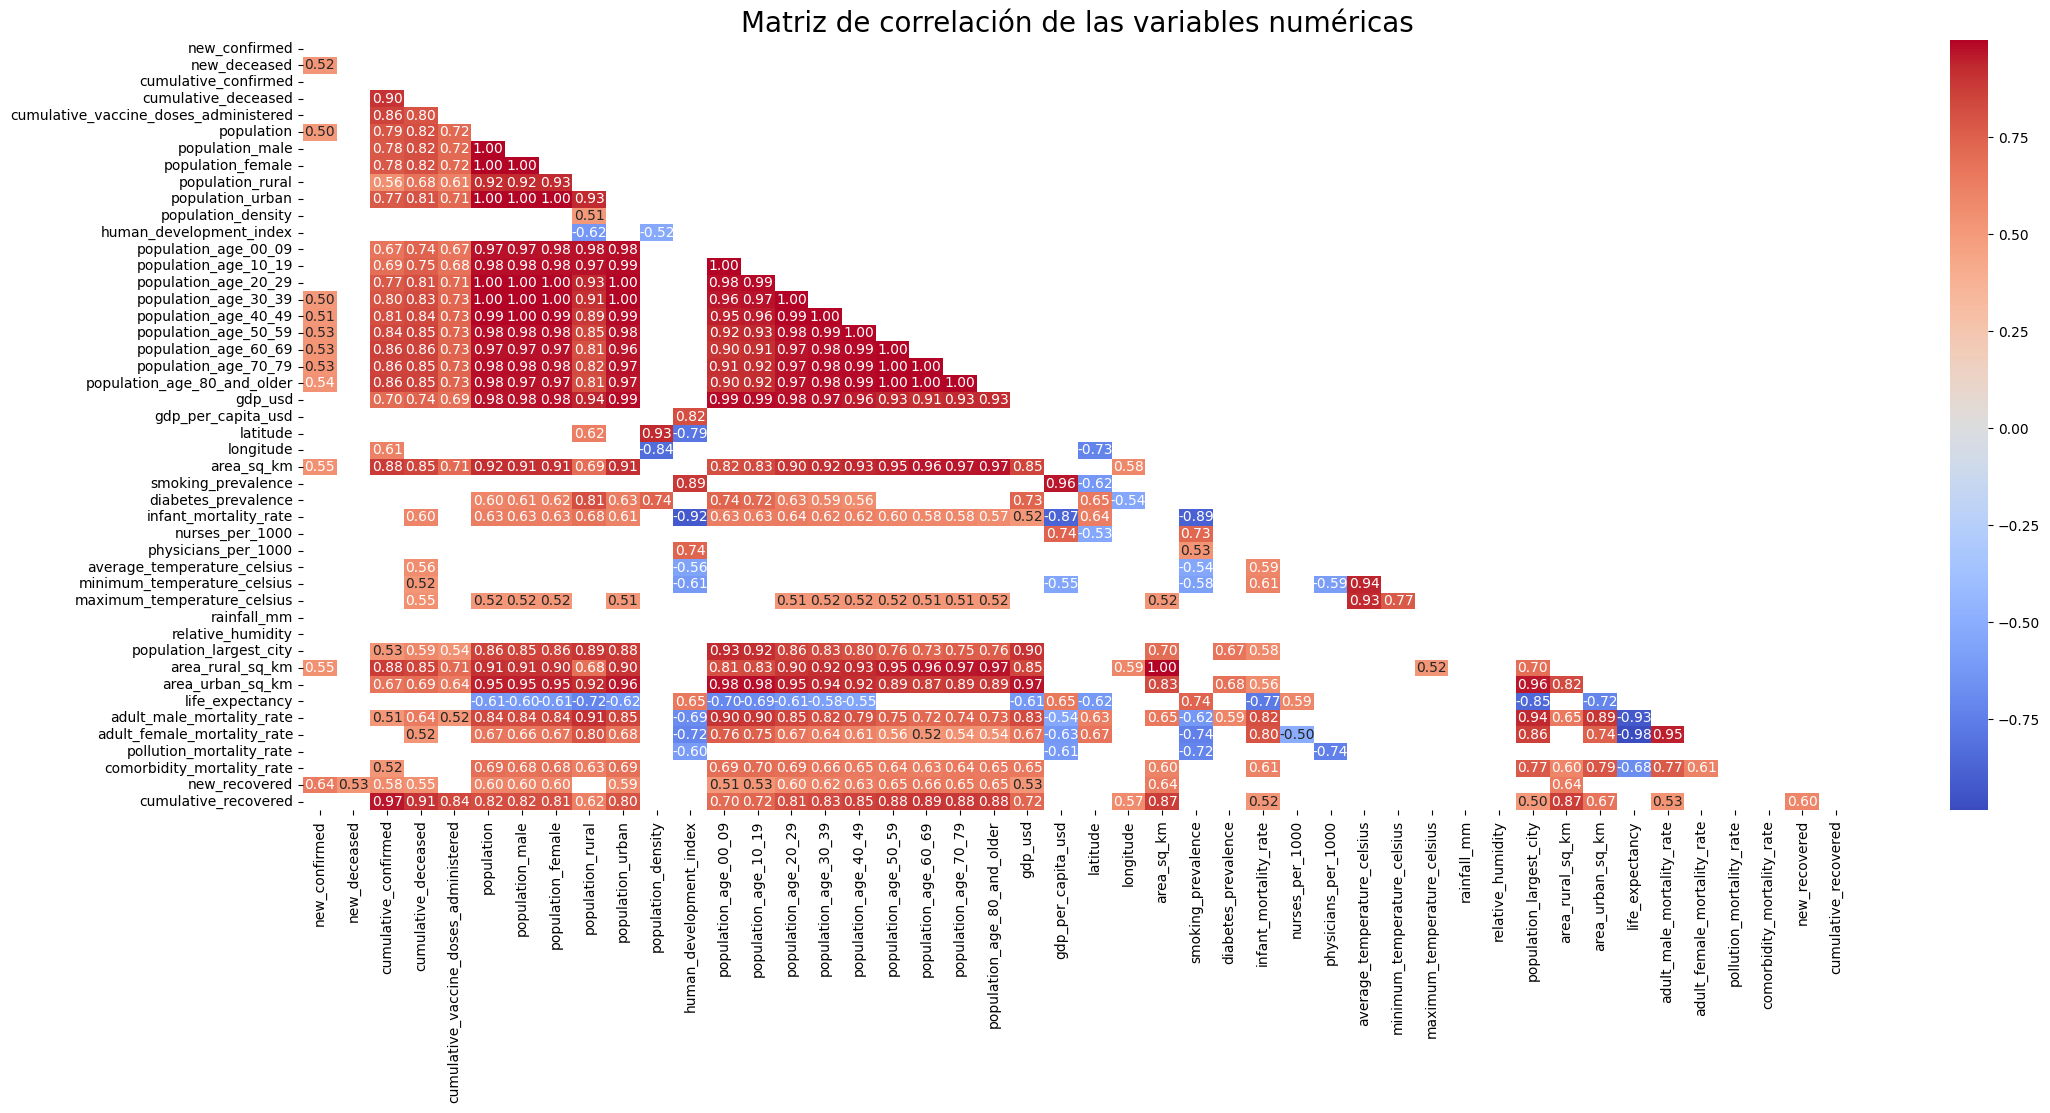

In [61]:
# Creamos una matriz de correlación para analizar relaciones entre las variables numéricas
# Correlación solo para las variables numéricas
numeric_columns = localizacion_paises.select_dtypes(include=['float64', 'int64']).columns
correlacion_matrix = localizacion_paises[numeric_columns].corr()

# Creamos una máscara para ocultar el triángulo superior de la matriz de correlación (pq A y B son simetricas)
mask = np.triu(np.ones_like(correlacion_matrix, dtype=bool))

# Filtramos las correlaciones mayores a 0.5 (positivas o negativas) [correlaciones que sean al menos moderadamente fuertes]
correlacion_matrix = correlacion_matrix[abs(correlacion_matrix) > 0.5]

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlacion_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

In [ ]:
"""
Esta línea calcula la matriz de correlación, que es una tabla que muestra cómo cada par de variables numéricas están relacionadas. Los valores de correlación varían entre -1 y 1:

1 indica una correlación positiva perfecta.
-1 indica una correlación negativa perfecta.
0 indica que no hay correlación.

"""

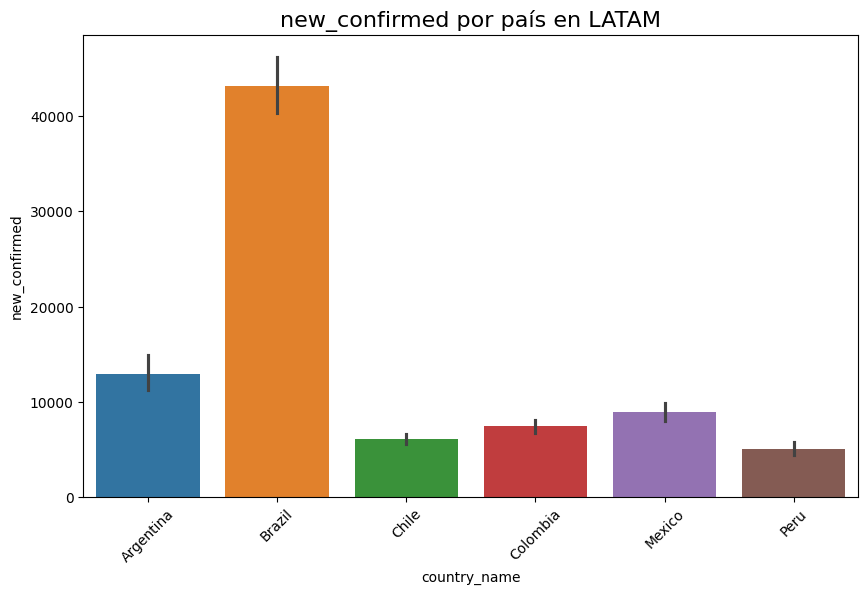

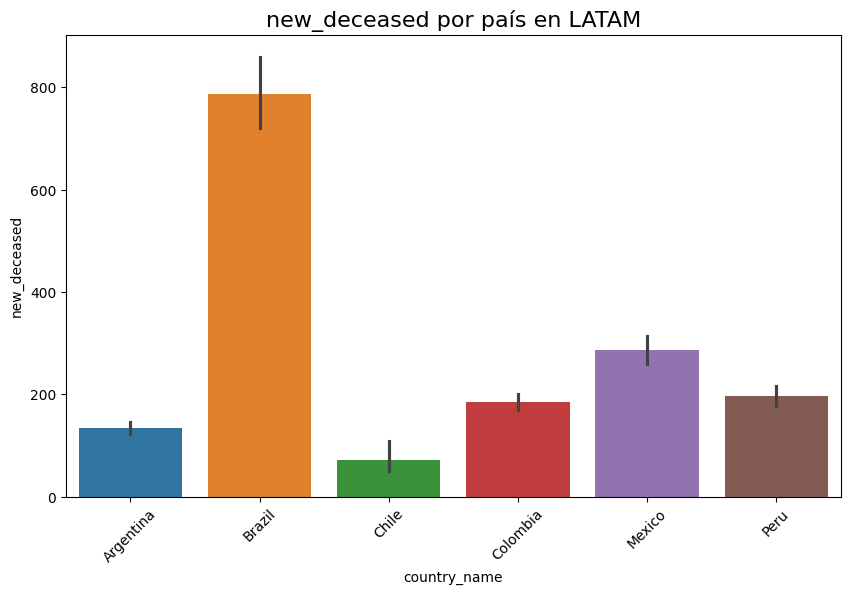

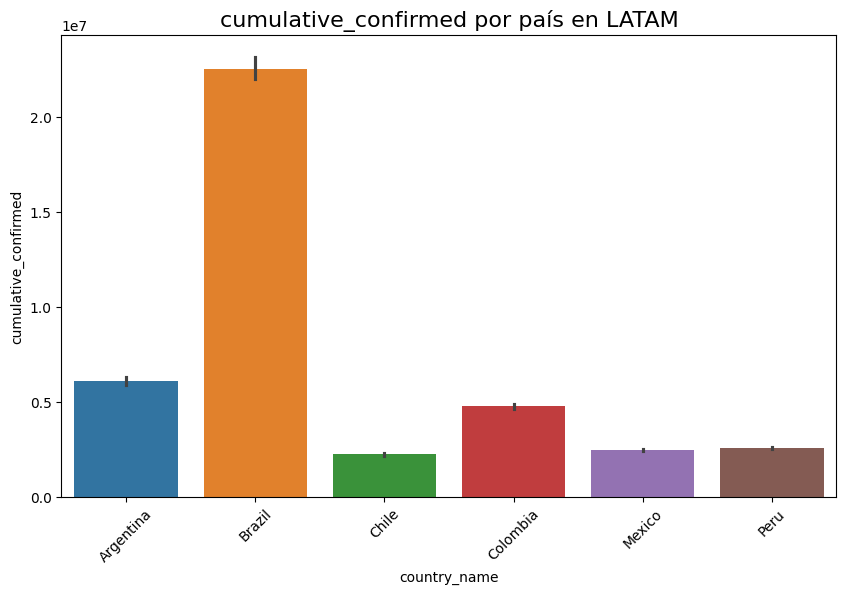

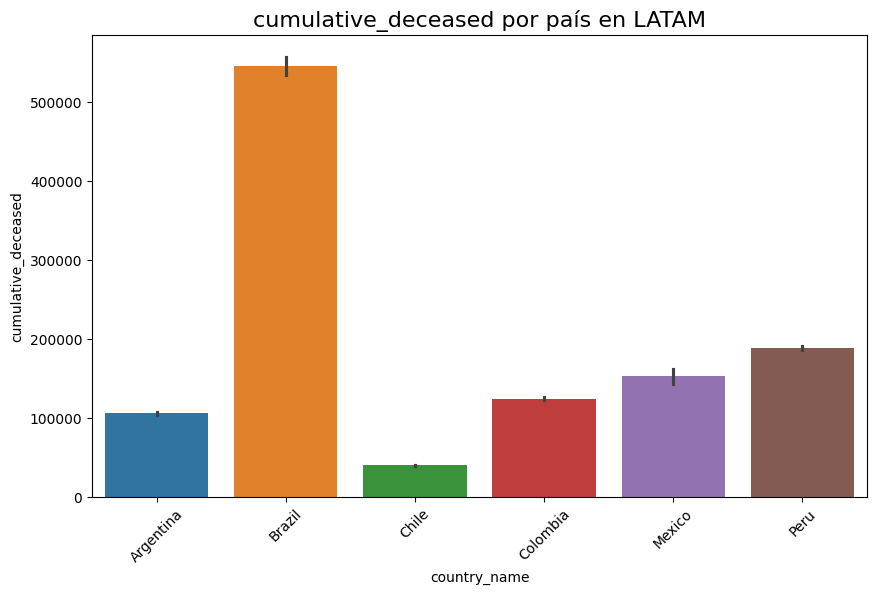

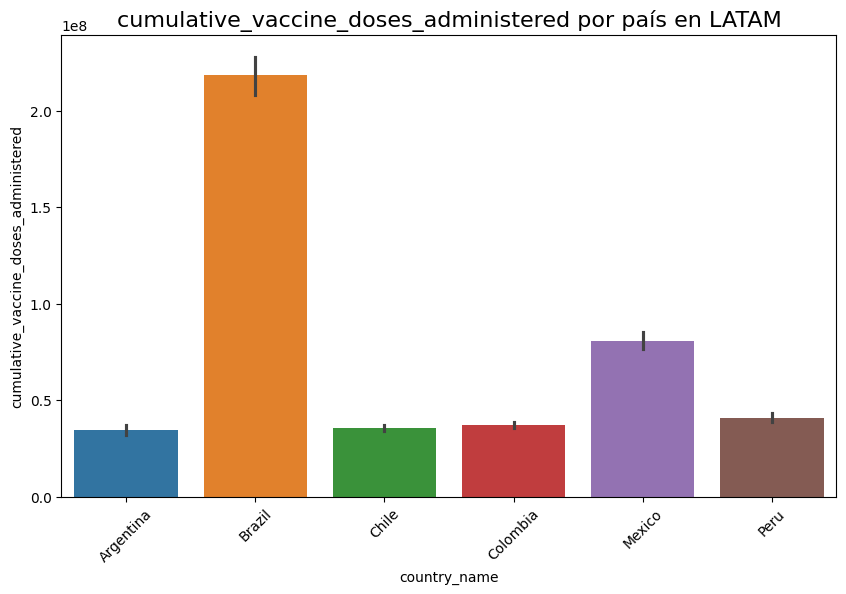

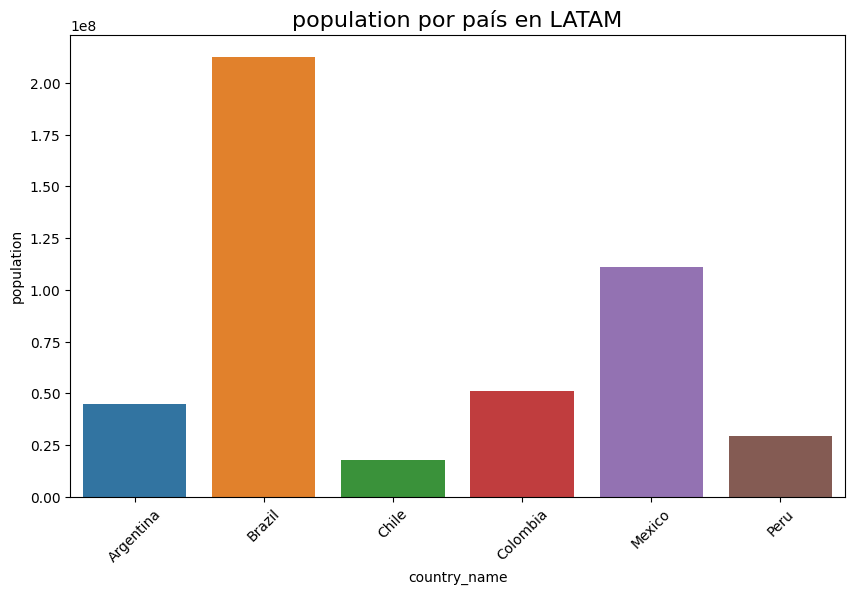

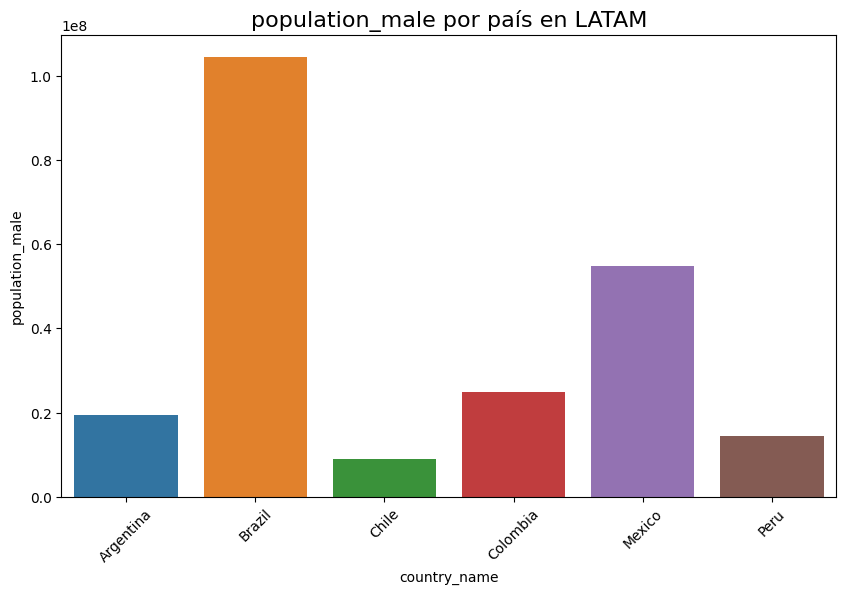

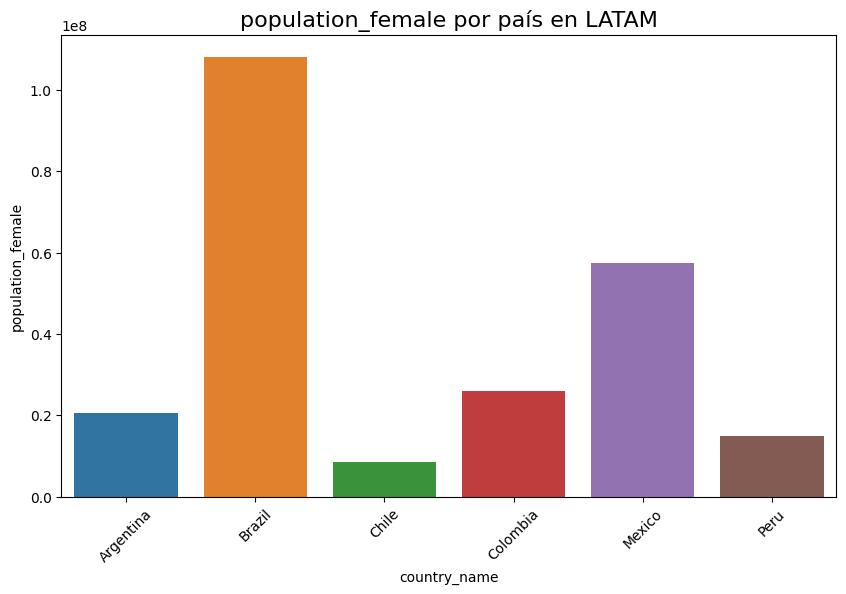

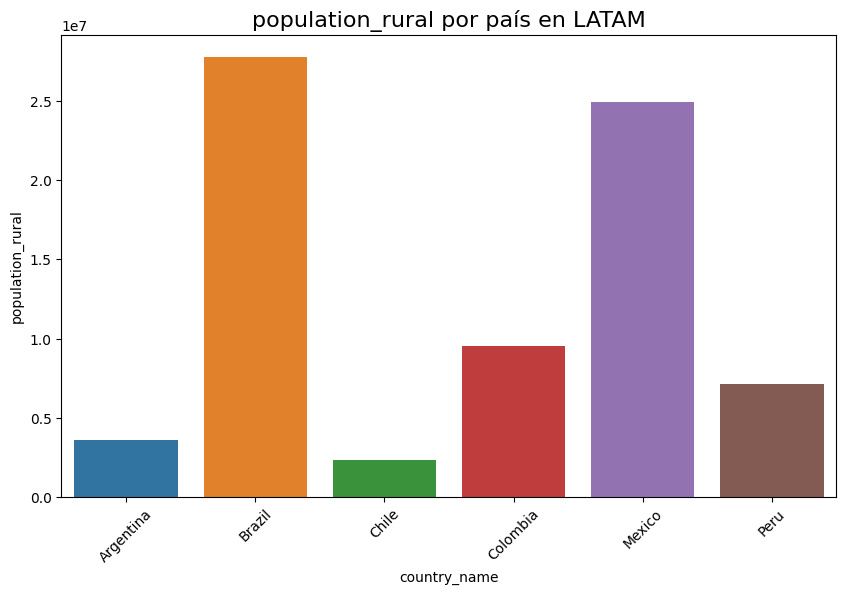

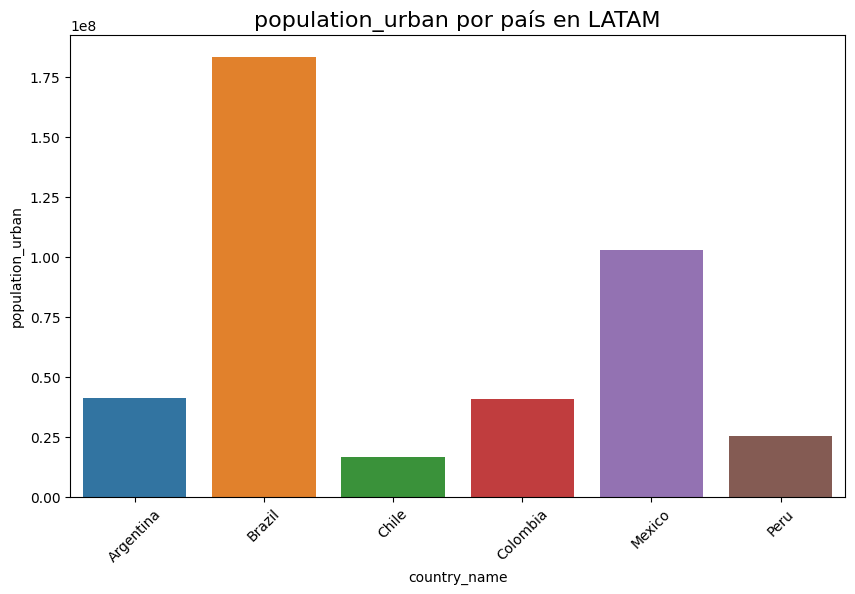

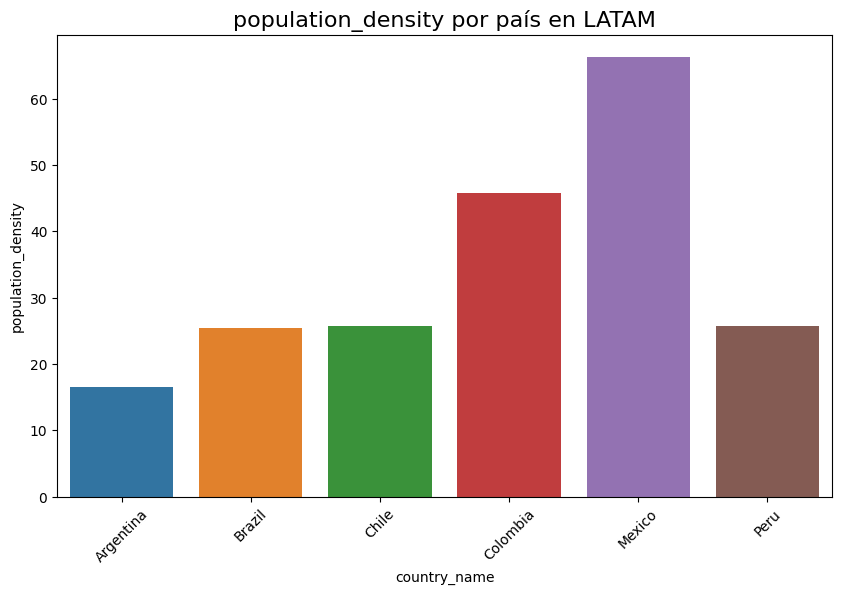

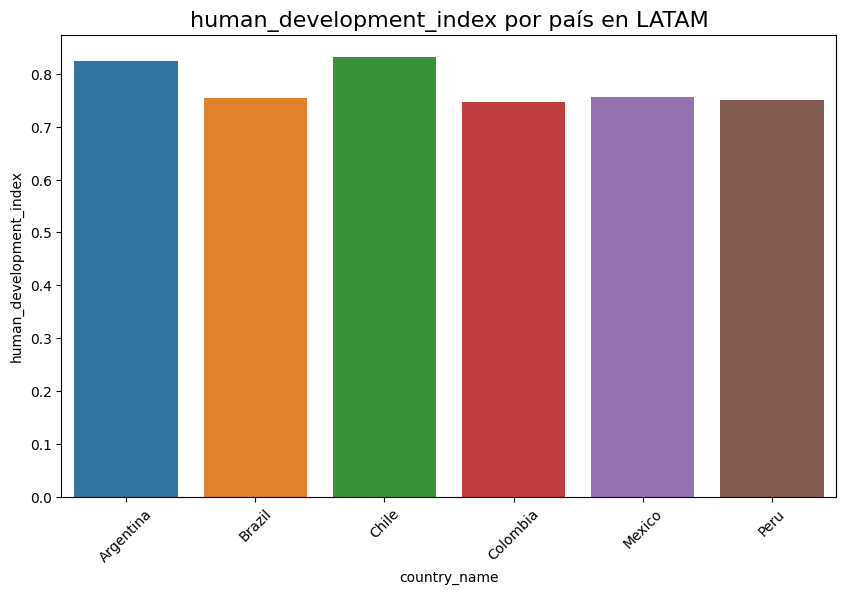

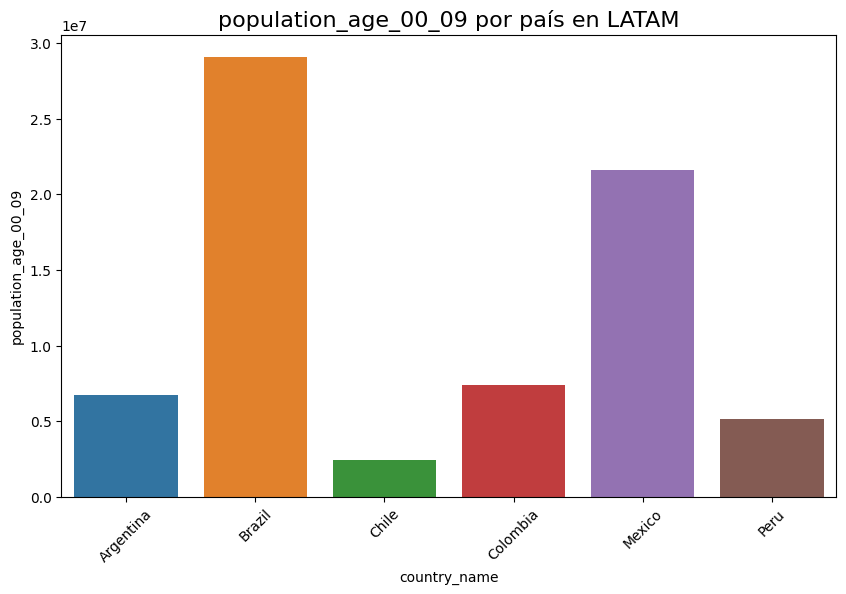

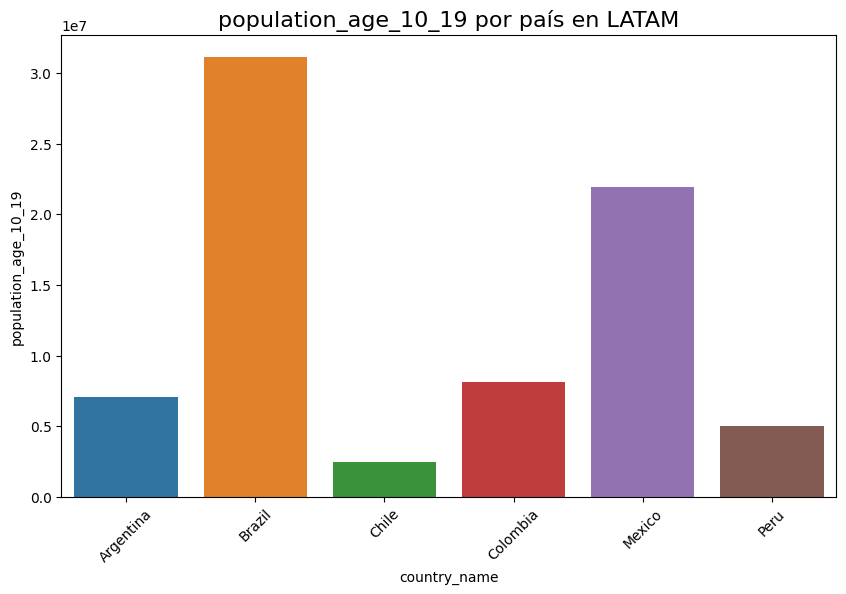

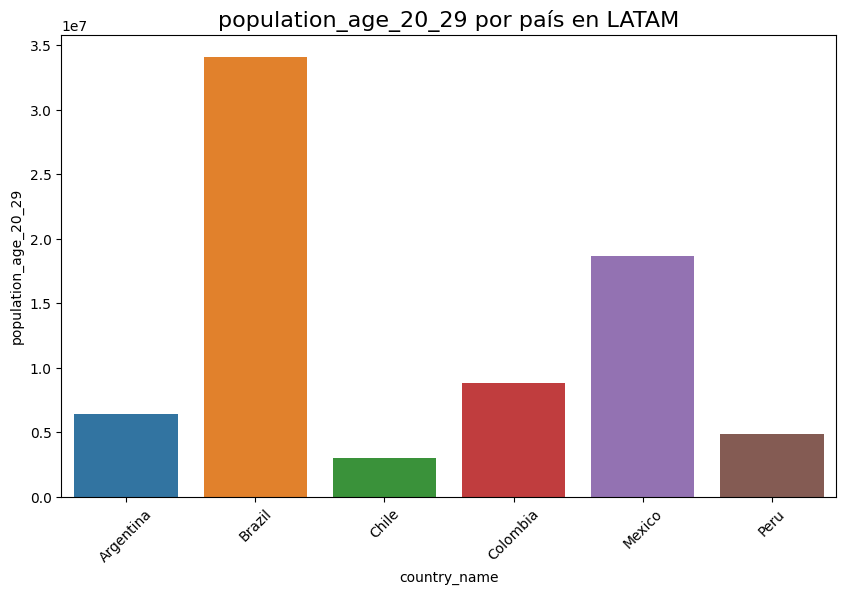

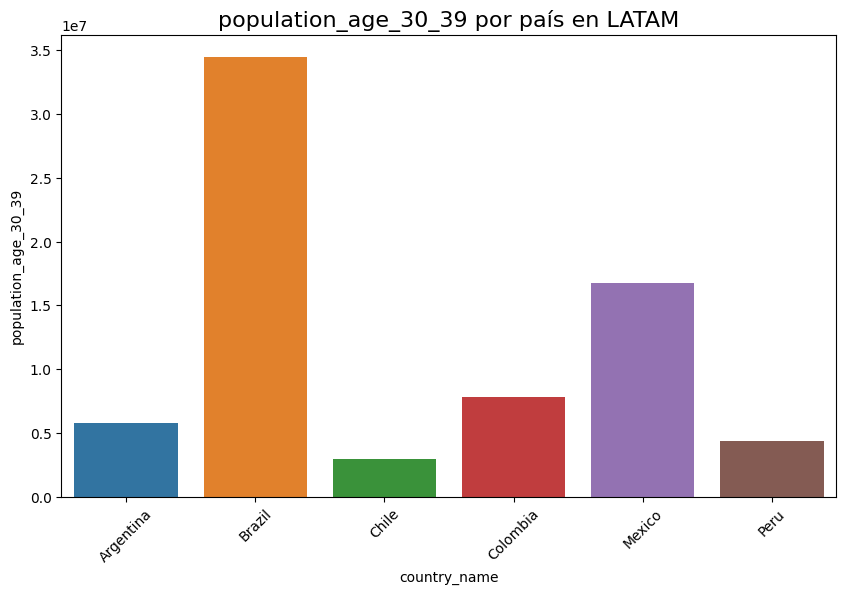

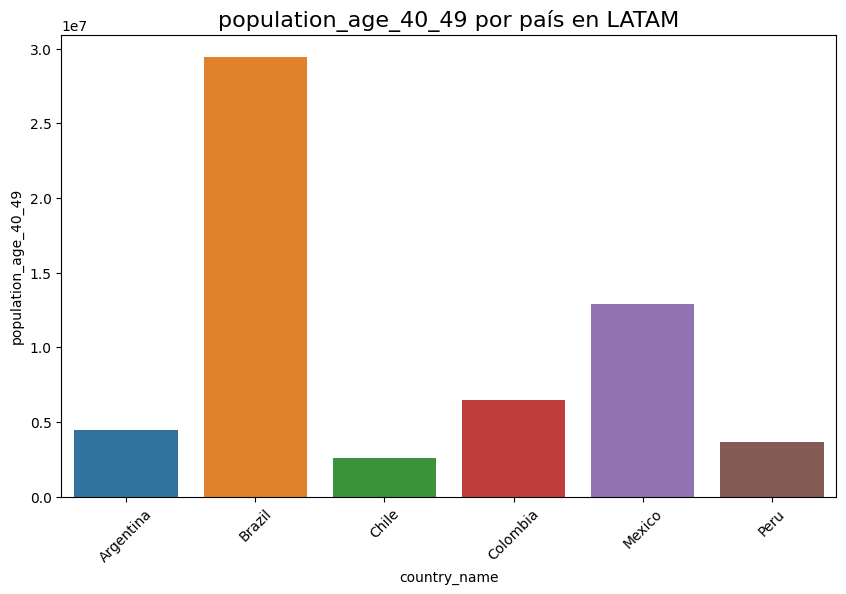

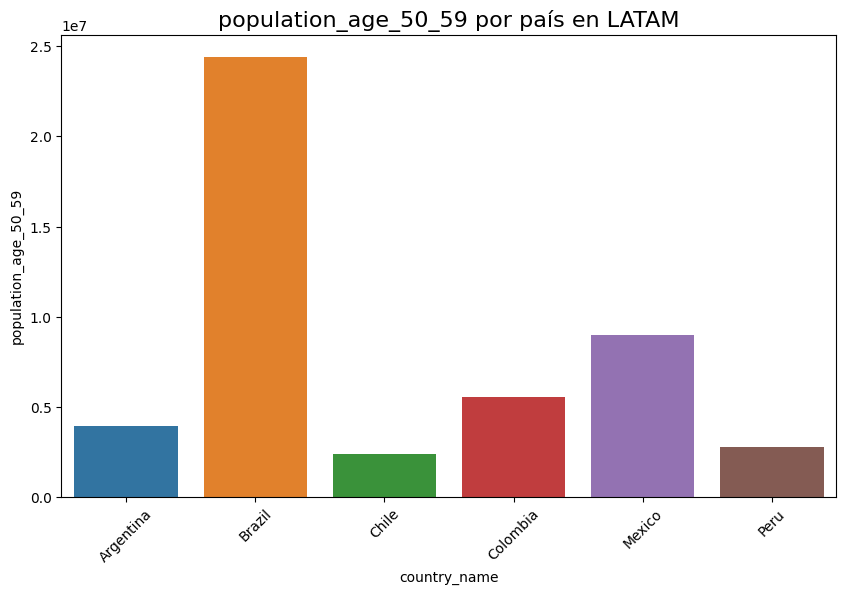

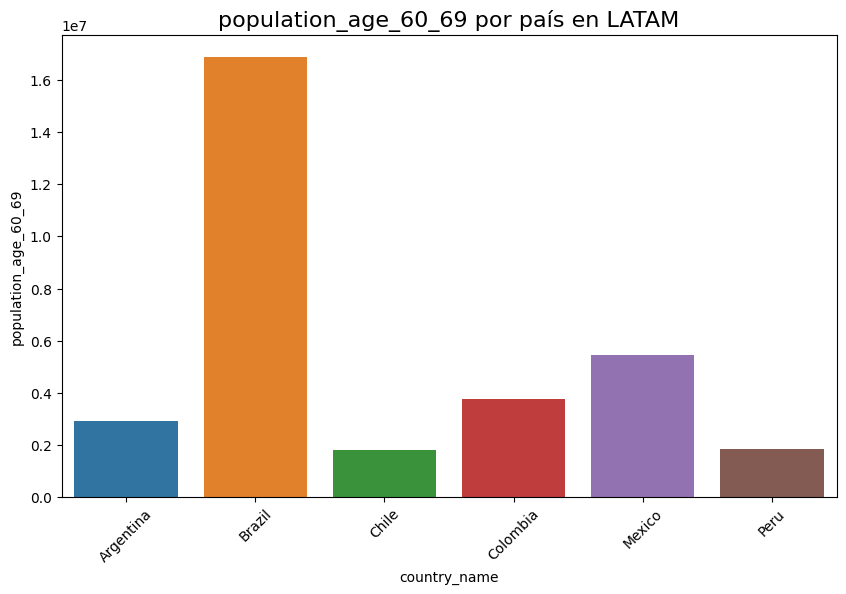

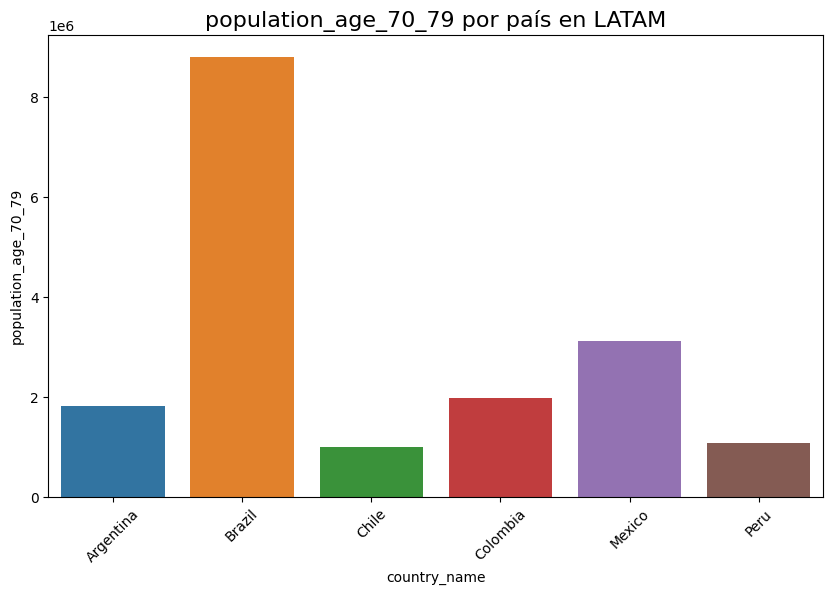

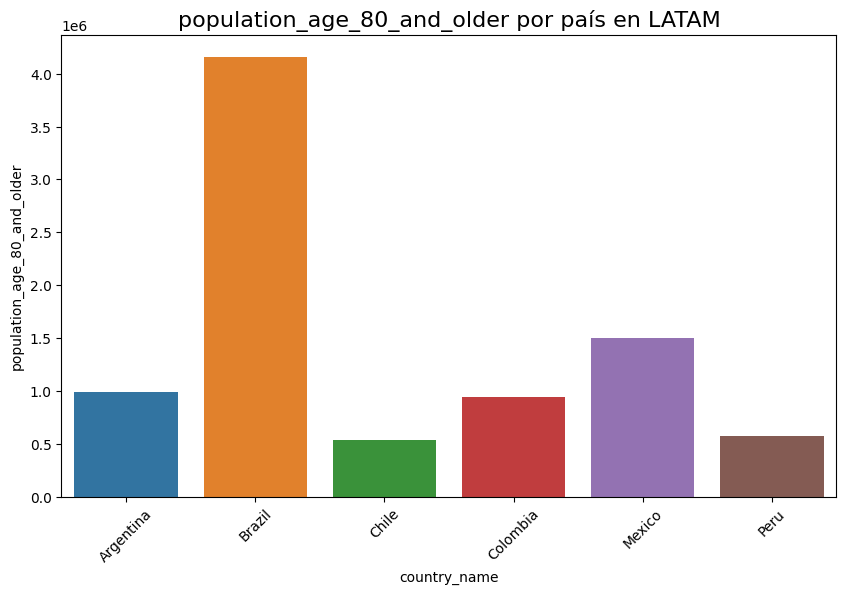

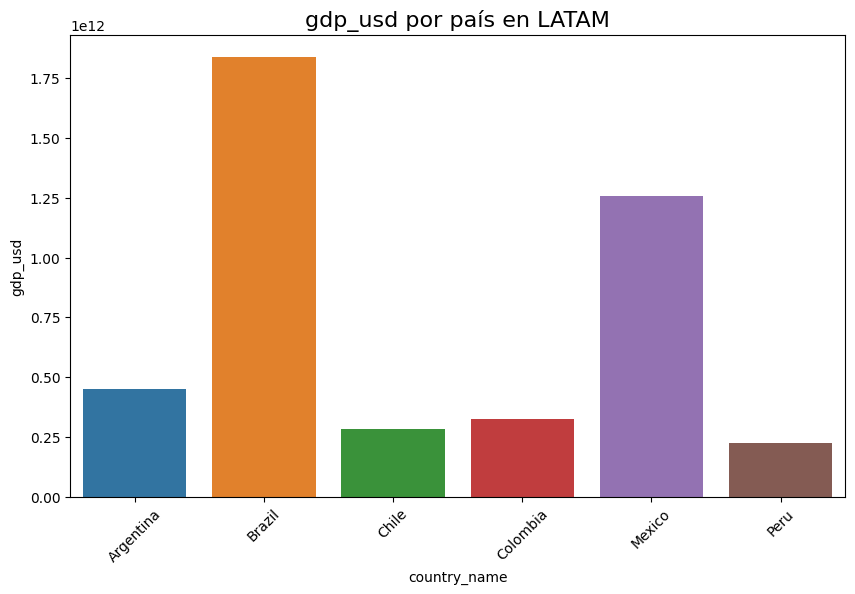

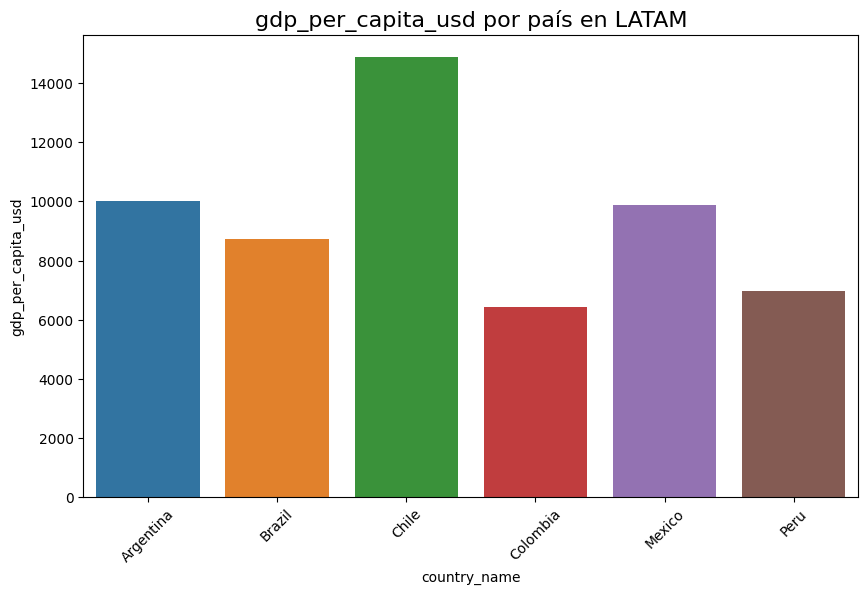

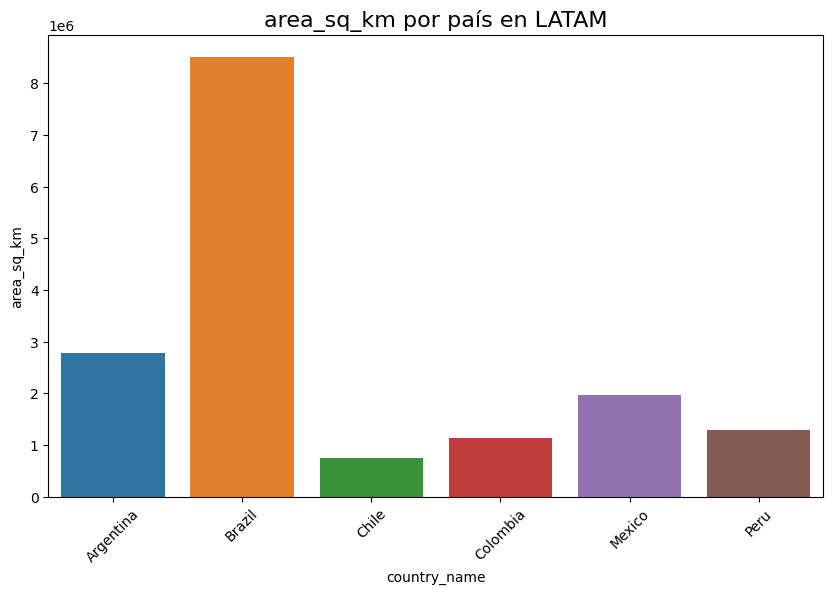

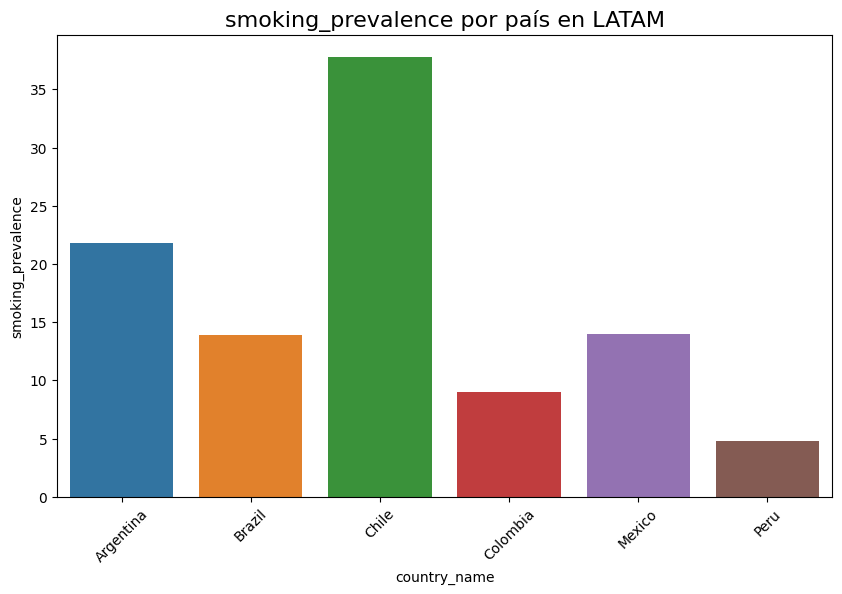

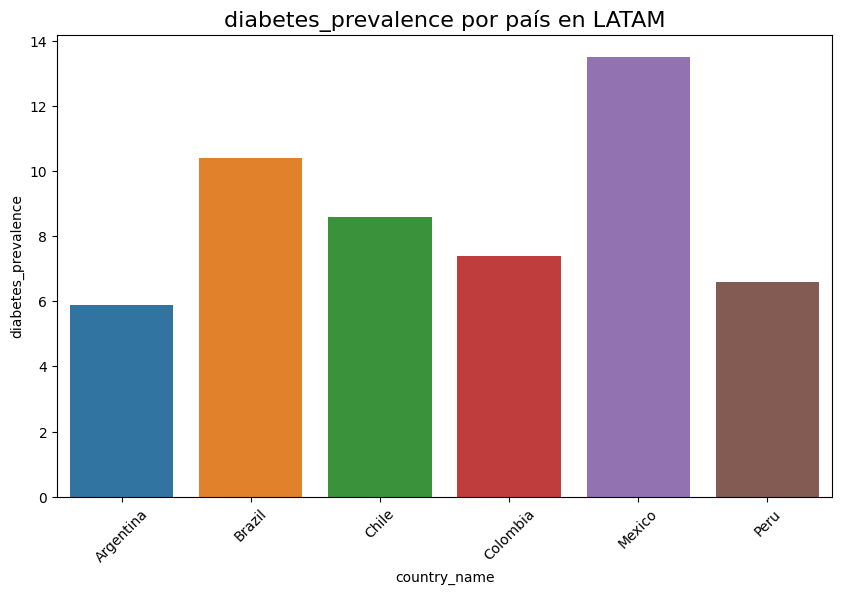

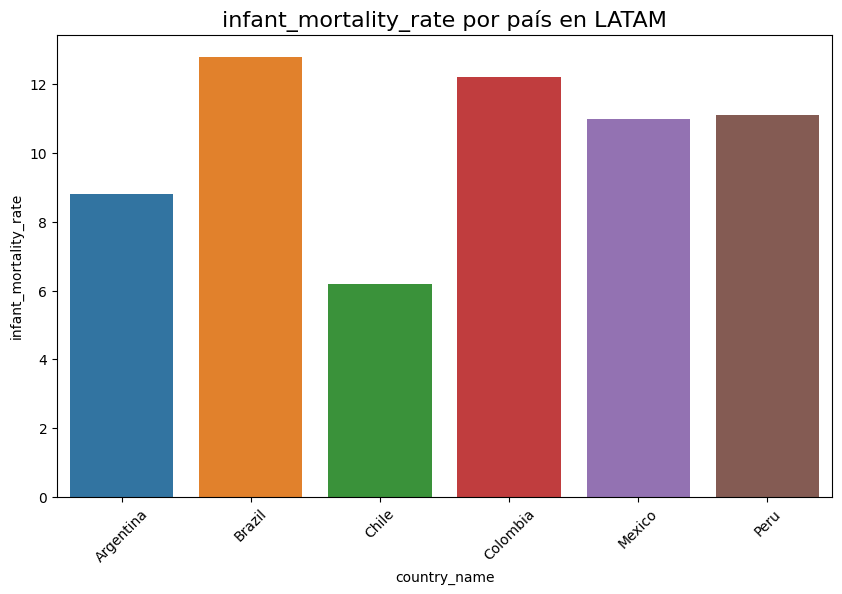

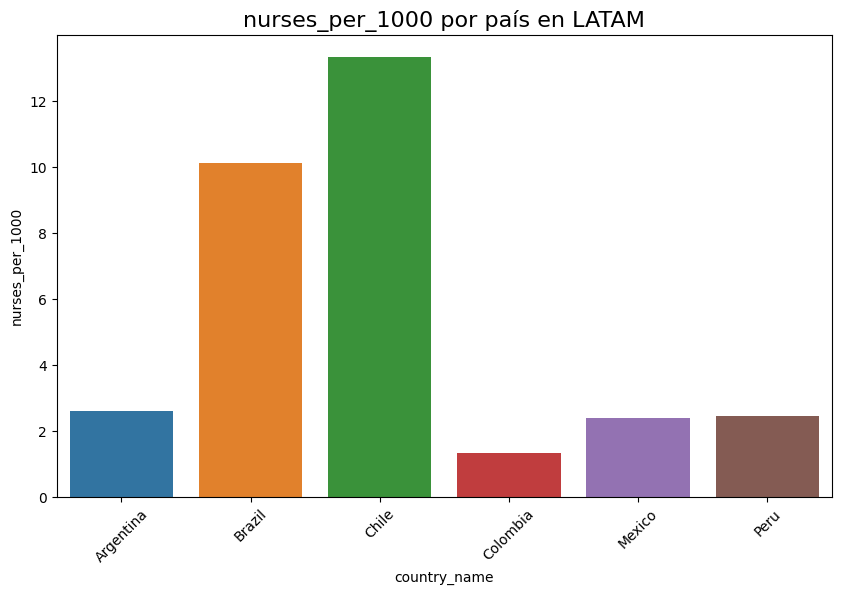

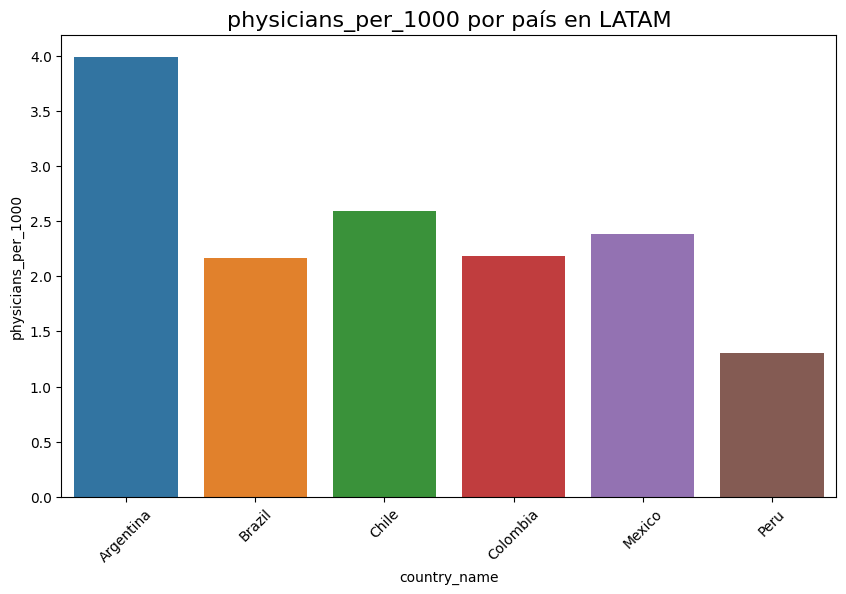

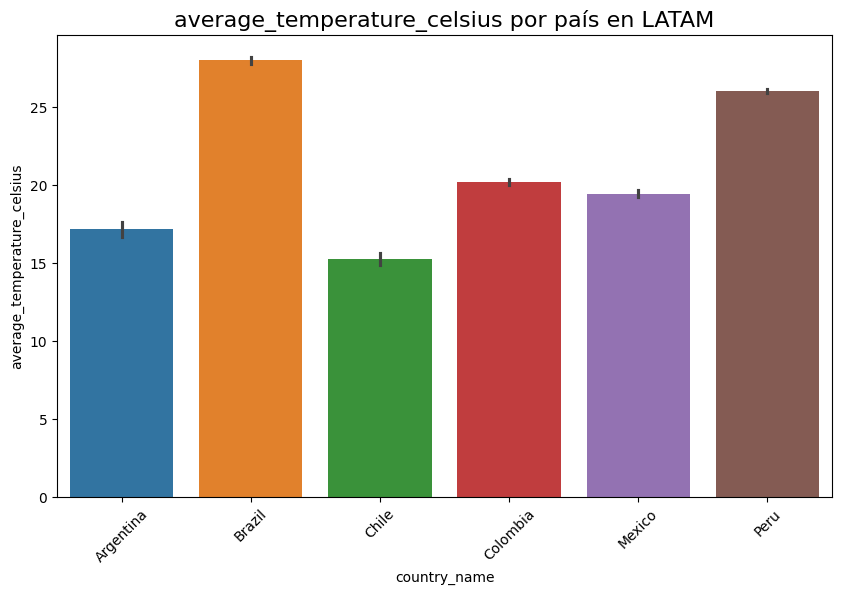

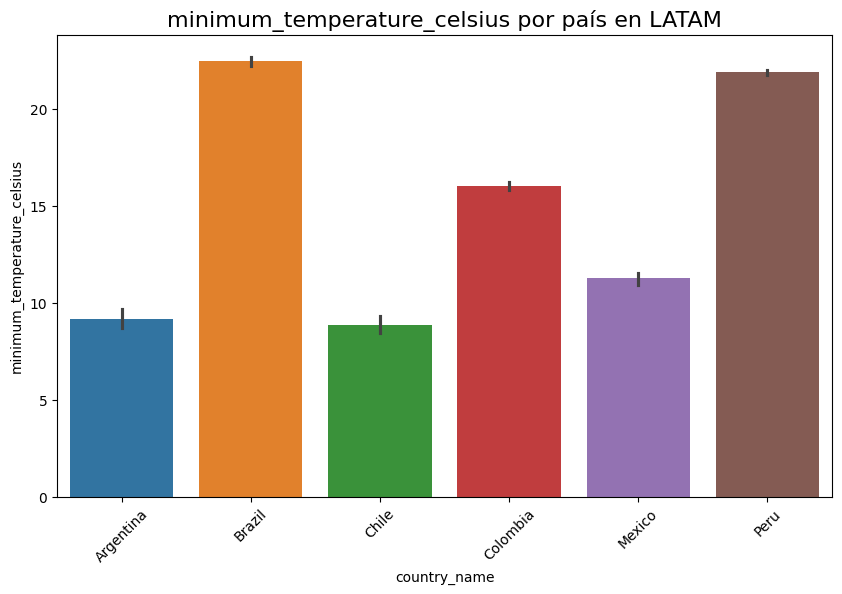

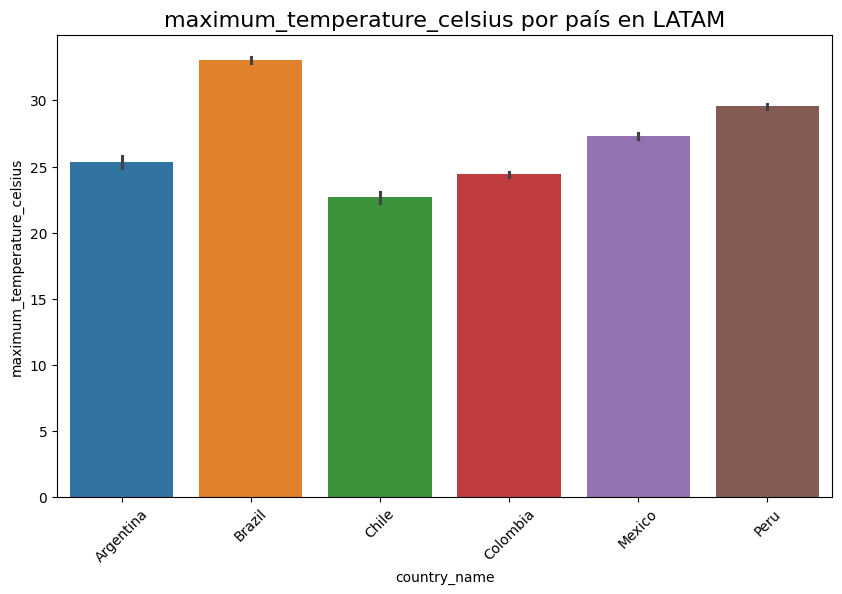

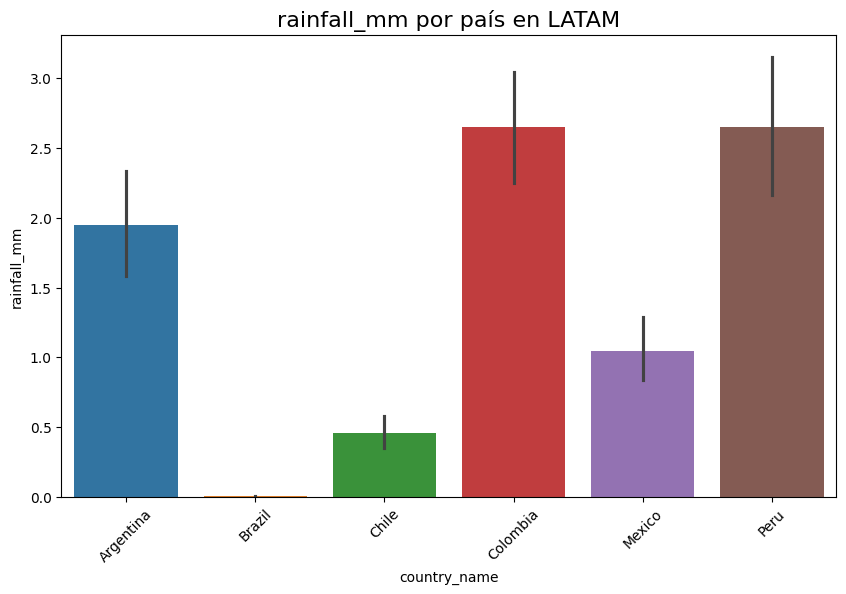

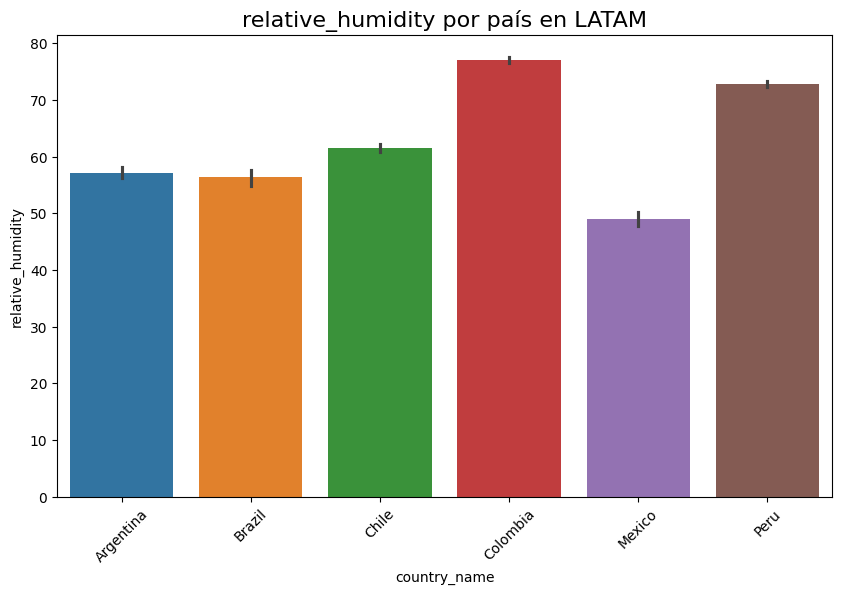

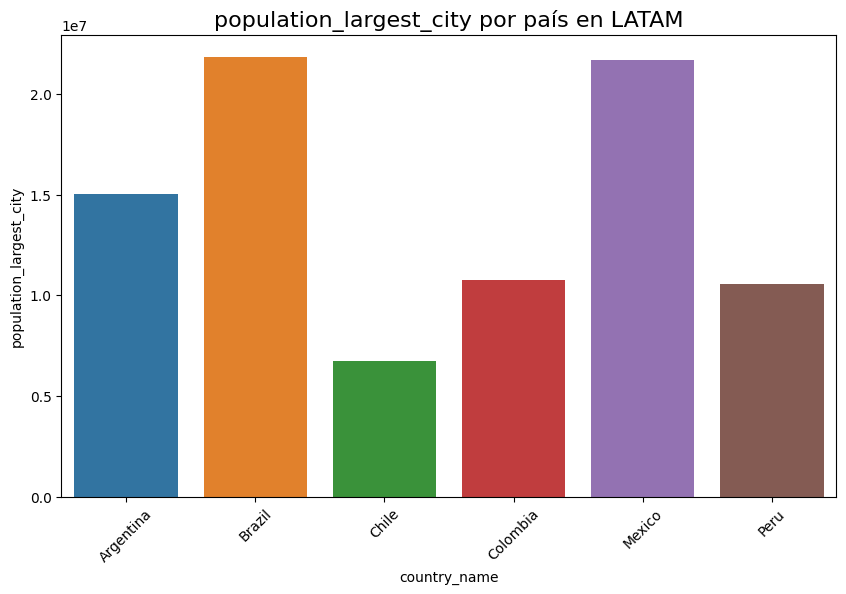

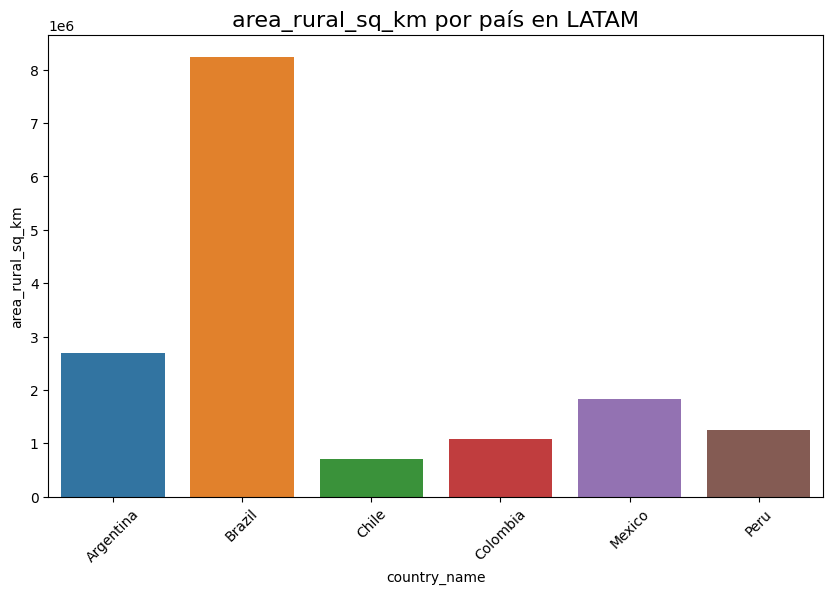

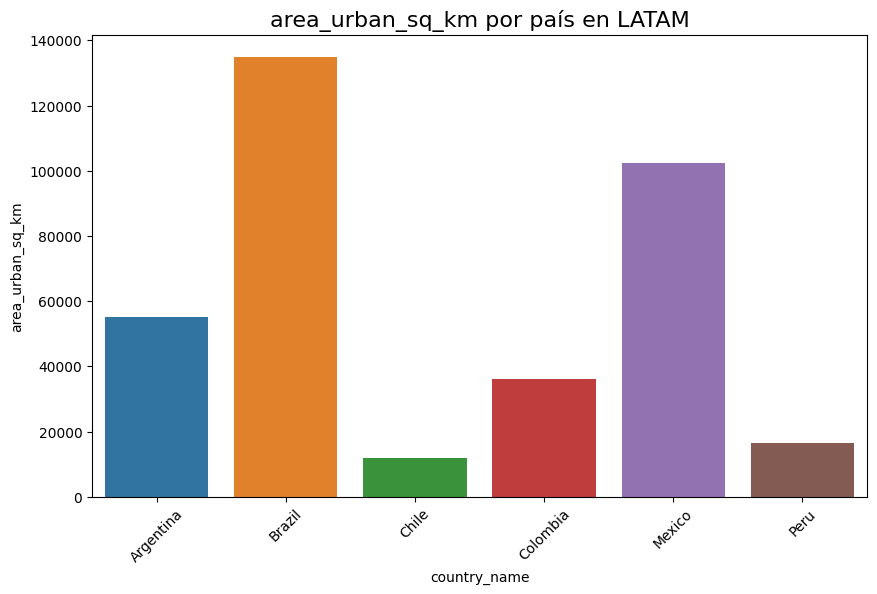

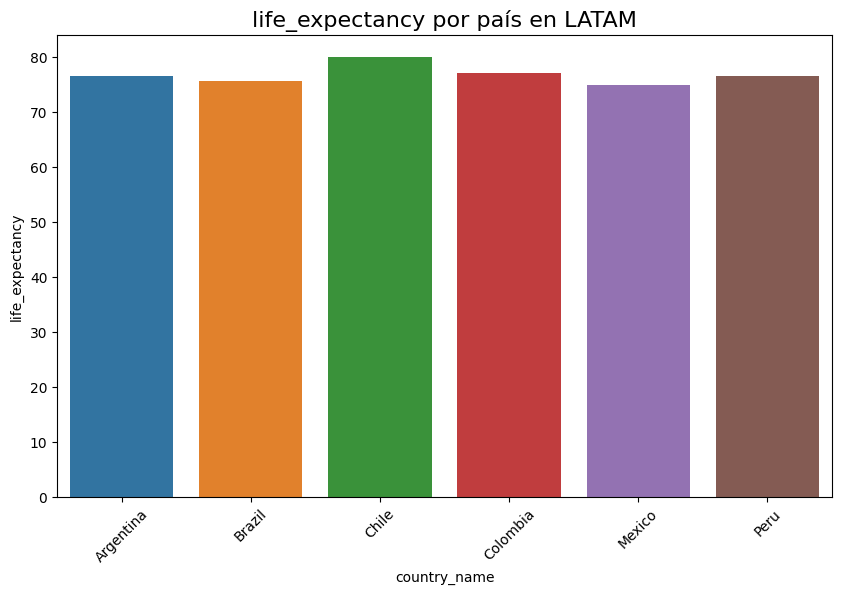

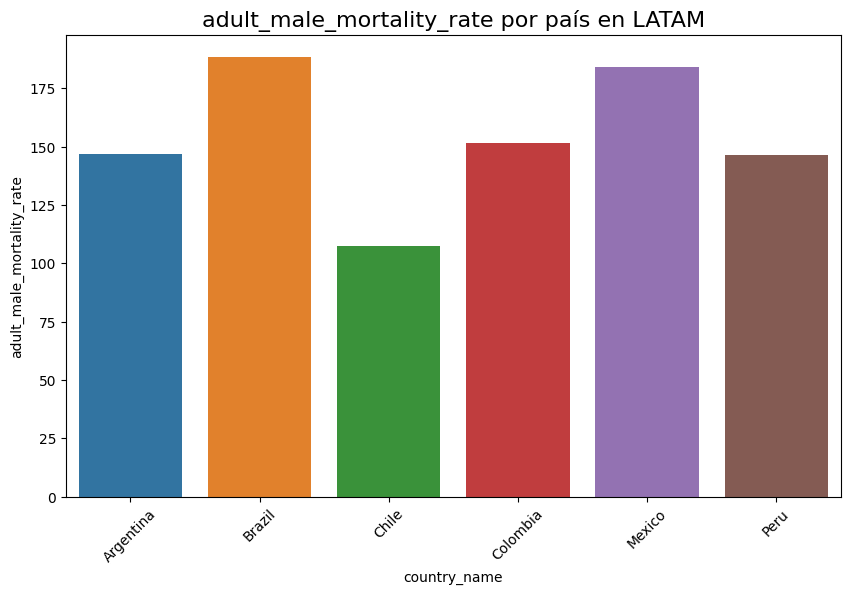

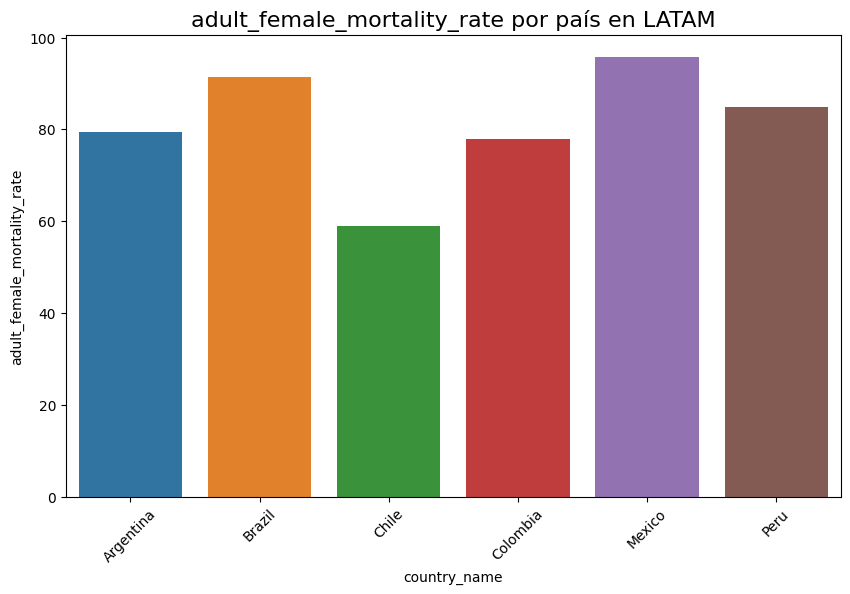

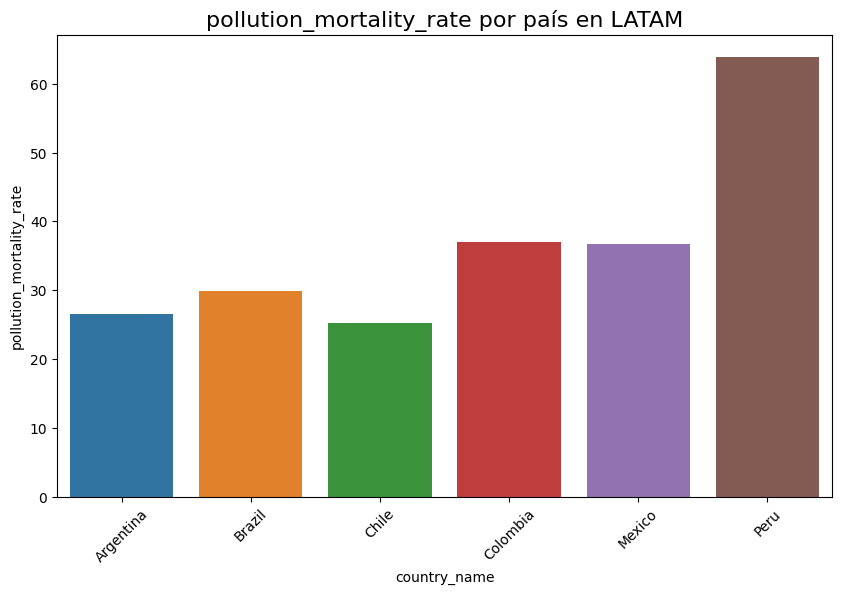

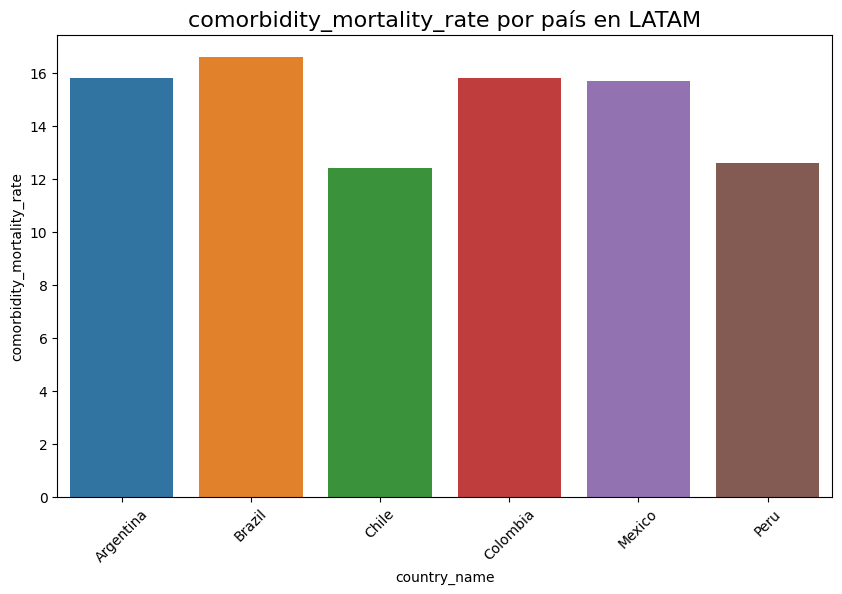

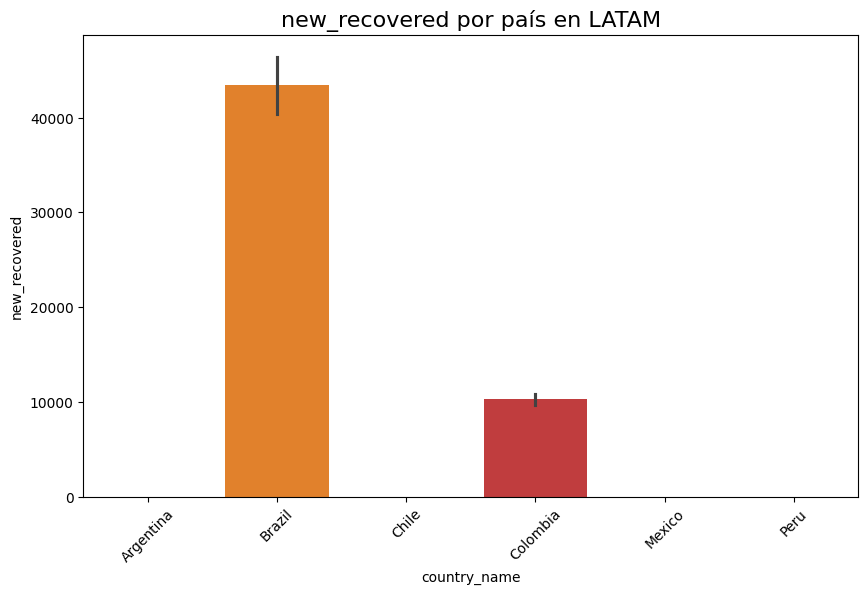

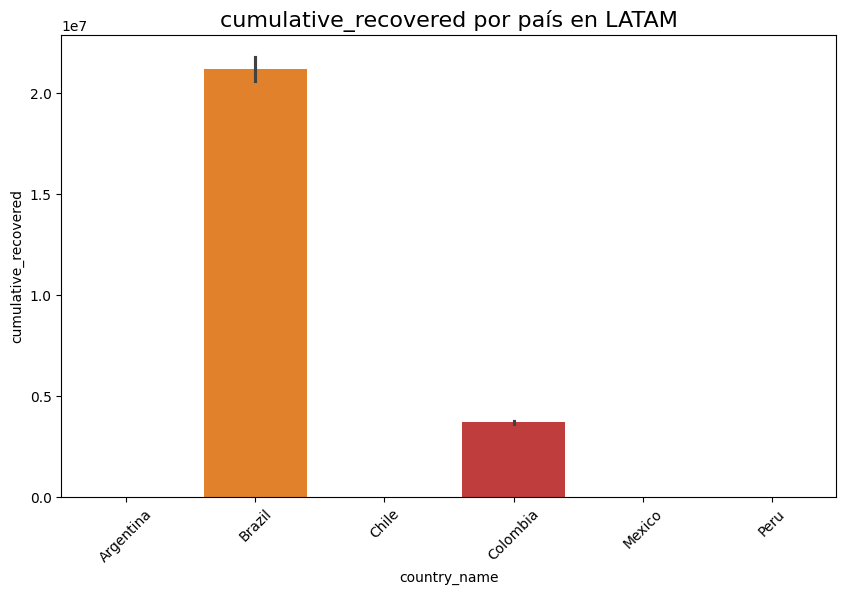

In [62]:
# Visualización de los datos: gráficos de barras para las variables por país
# Usamos gráficos de barras para representar diferentes variables por país
for col in numeric_columns:
    if col not in ['location_key', 'latitude', 'longitude']:  # Excluimos columnas irrelevantes para visualización
        plt.figure(figsize=(10, 6))
        sns.barplot(x='country_name', y=col, data=localizacion_paises, hue='country_name')
        plt.title(f'{col} por país en LATAM', fontsize=16)
        plt.xticks(rotation=45)
        plt.show()

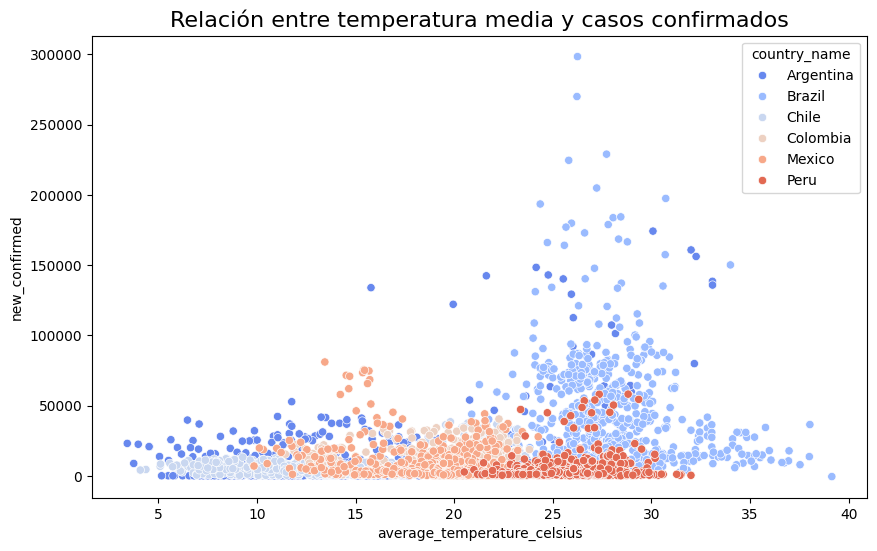

In [63]:
# Diagrama de dispersión: Relación entre temperatura media y casos confirmados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=localizacion_paises, hue='country_name', palette='coolwarm')
plt.title('Relación entre temperatura media y casos confirmados', fontsize=16)
plt.show()

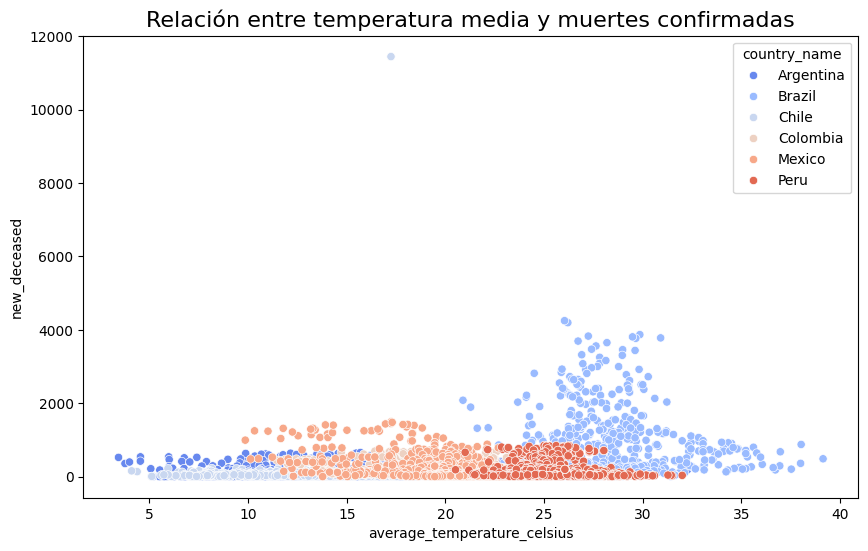

In [64]:
# Diagrama de dispersión: Relación entre temperatura media y muertes confirmadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=localizacion_paises, hue='country_name', palette='coolwarm')
plt.title('Relación entre temperatura media y muertes confirmadas', fontsize=16)
plt.show()


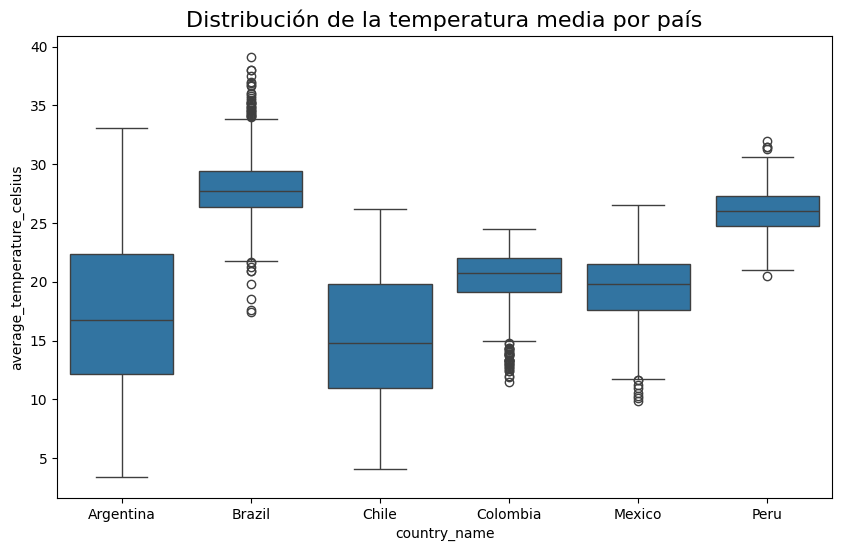

In [65]:
# Boxplot de la temperatura media por país
plt.figure(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=localizacion_paises)
plt.title('Distribución de la temperatura media por país', fontsize=16)
plt.show()

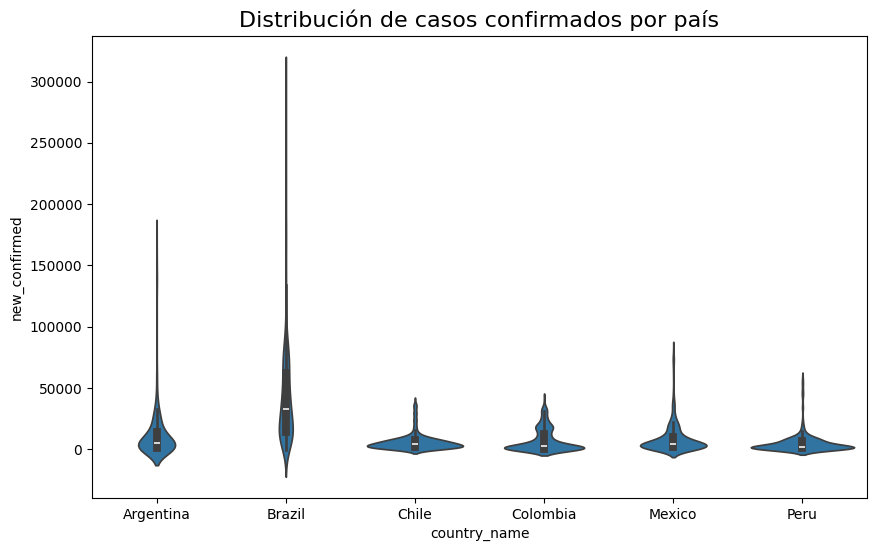

In [66]:
# Violinplot de la variable 'new_confirmed' por país
plt.figure(figsize=(10, 6))
sns.violinplot(x='country_name', y='new_confirmed', data=localizacion_paises)
plt.title('Distribución de casos confirmados por país', fontsize=16)
plt.show()

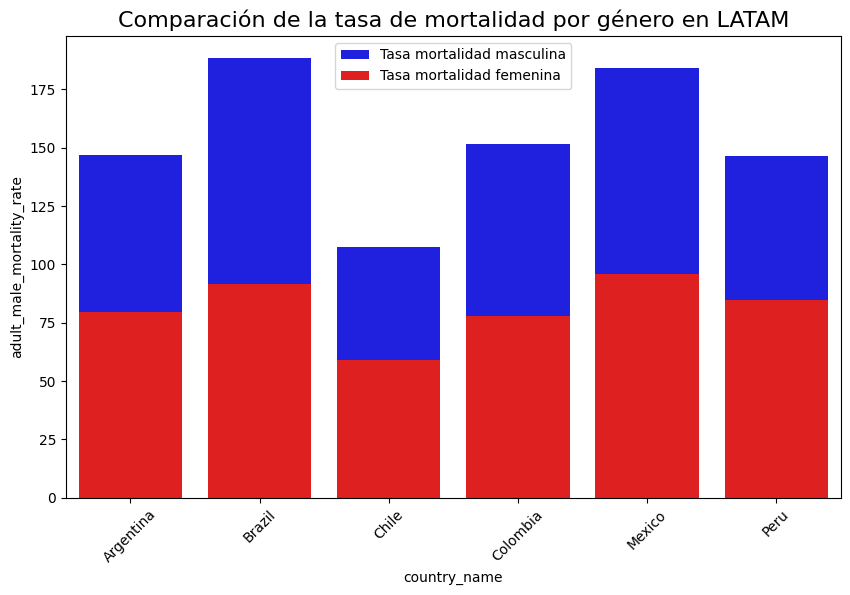

In [67]:
# Gráfico de barras apilado: Comparación de tasa de mortalidad masculina vs femenina por país
plt.figure(figsize=(10, 6))
sns.barplot(x='country_name', y='adult_male_mortality_rate', data=localizacion_paises, color='b', label='Tasa mortalidad masculina')
sns.barplot(x='country_name', y='adult_female_mortality_rate', data=localizacion_paises, color='r', label='Tasa mortalidad femenina')
plt.title('Comparación de la tasa de mortalidad por género en LATAM', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.show()


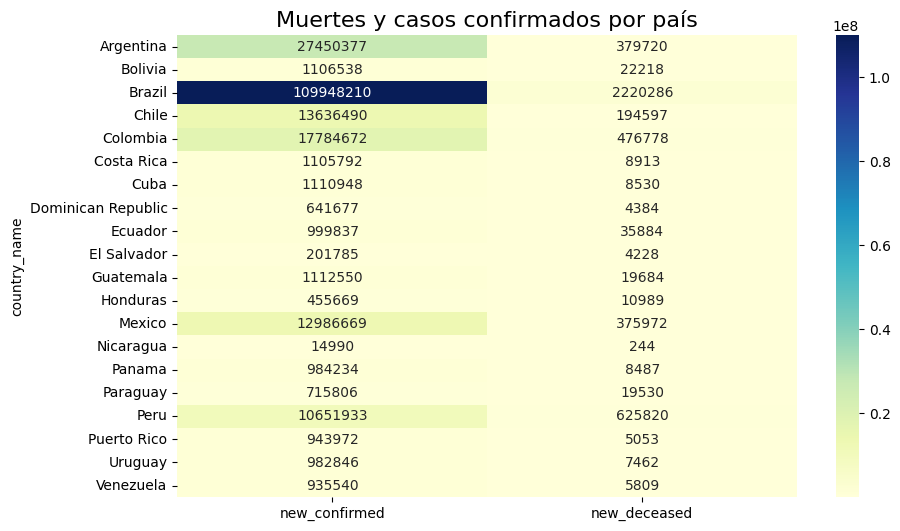

In [68]:
# Mapa de calor: Muertes y casos confirmados por país
# Seleccionamos variables clave para crear el mapa de calor
heatmap_data = df.pivot_table(index='country_name', values=['new_deceased', 'new_confirmed'], aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Muertes y casos confirmados por país', fontsize=16)
plt.show()

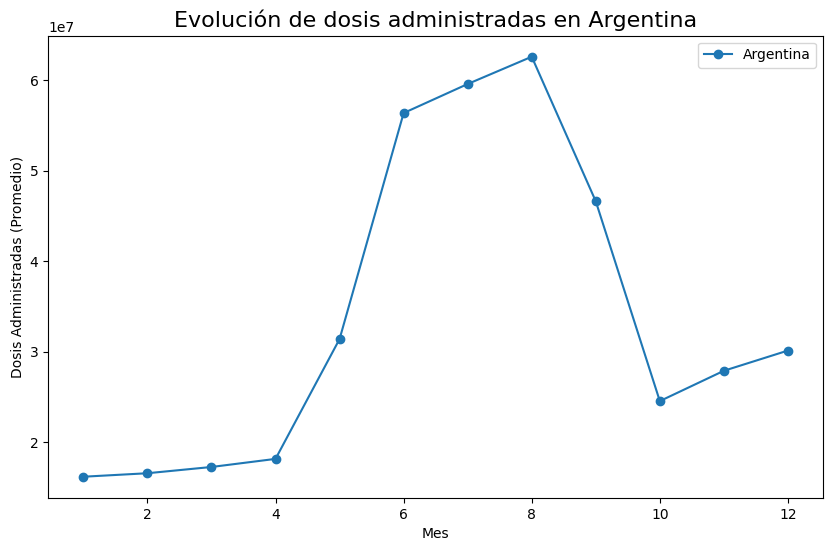

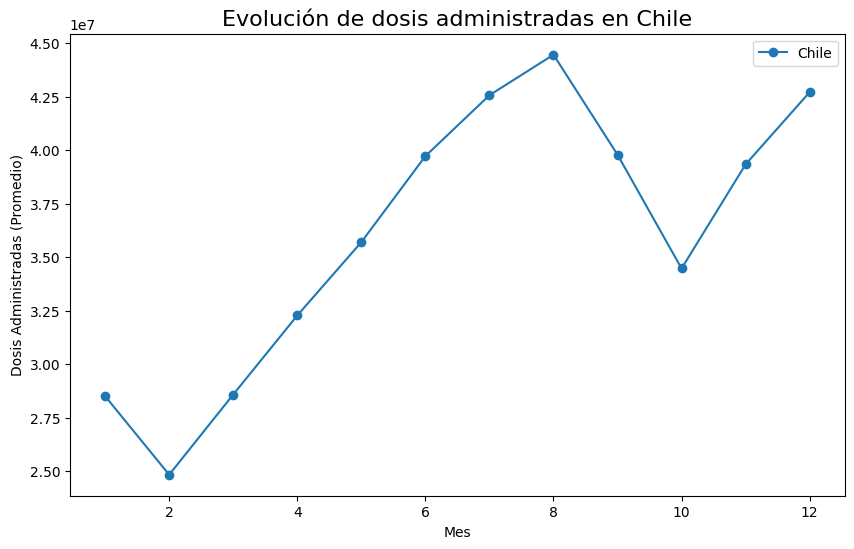

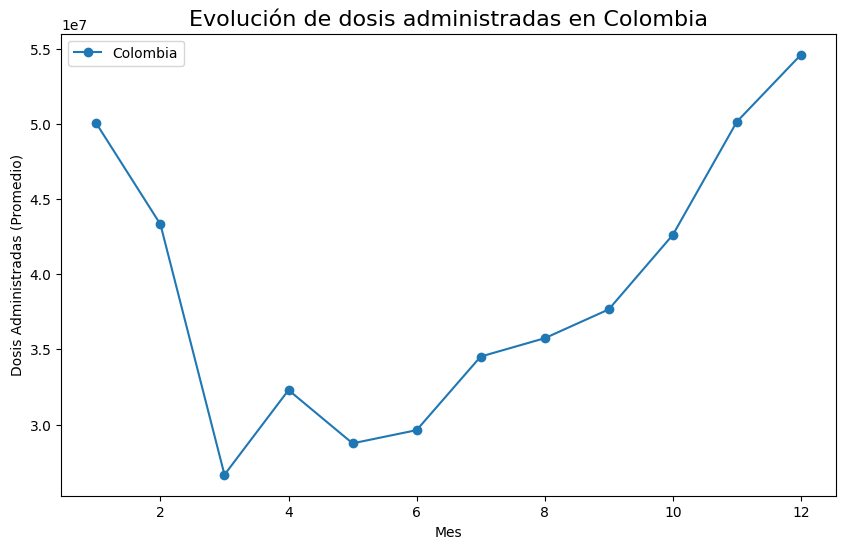

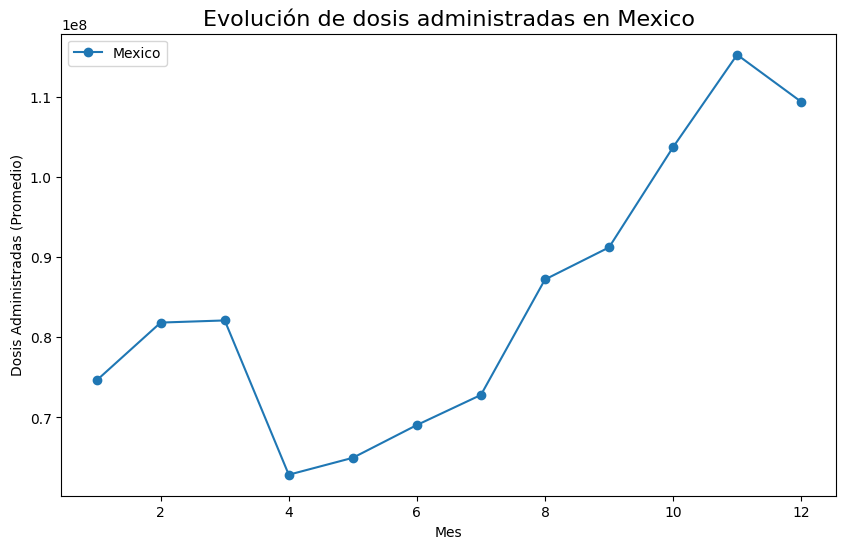

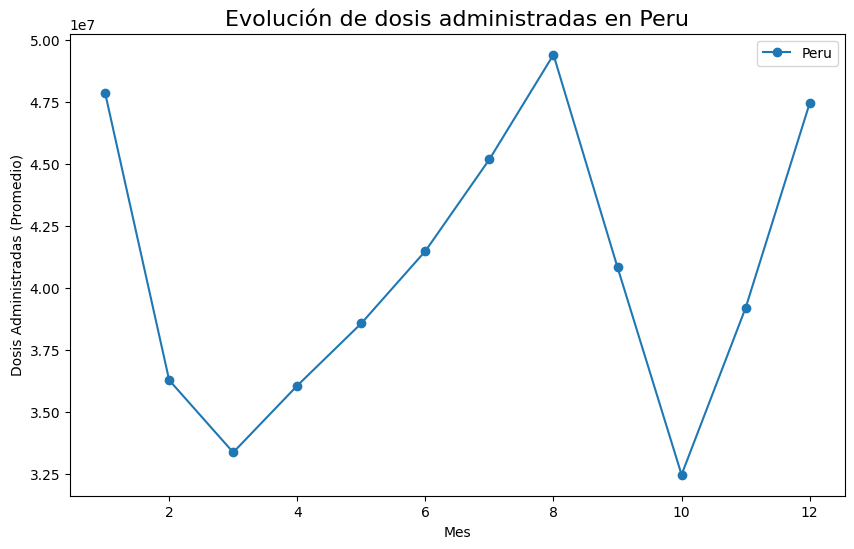

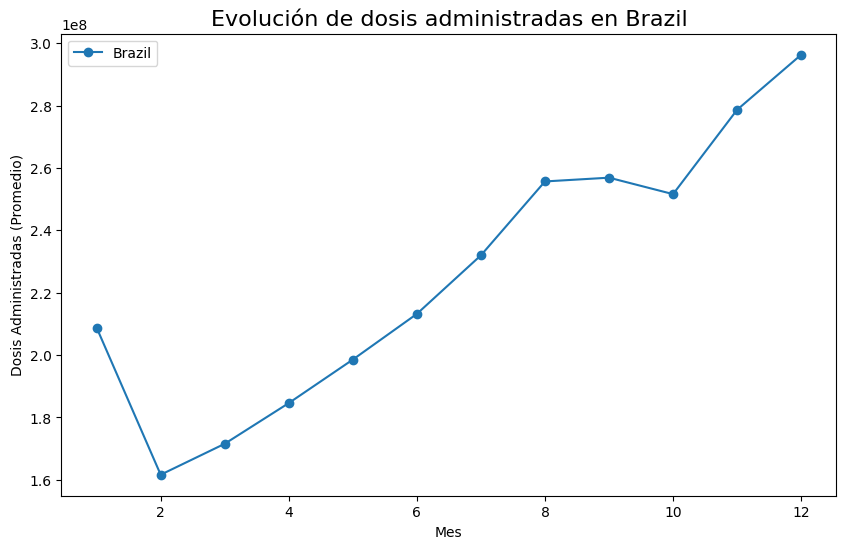

In [69]:
# Análisis de tendencias y patrones
# Visualizamos la evolución de las dosis administradas por mes en cada país
localizacion_paises['month'] = localizacion_paises.index.month
for country in paises:
    country_data = localizacion_paises[localizacion_paises['country_name'] == country]
    monthly_doses = country_data.groupby('month')['cumulative_vaccine_doses_administered'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_doses.index, monthly_doses.values, marker='o', label=country)
    plt.title(f'Evolución de dosis administradas en {country}', fontsize=16)
    plt.xlabel('Mes')
    plt.ylabel('Dosis Administradas (Promedio)')
    plt.legend()
    plt.show()

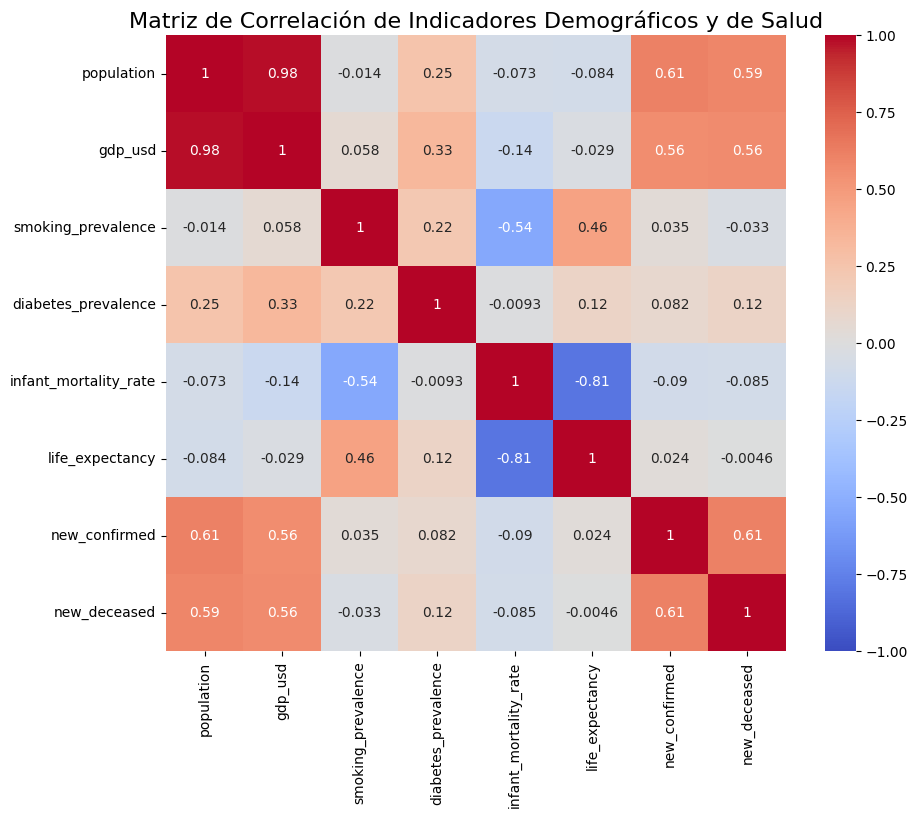

In [70]:
#Matriz de correlación de indicadores demográficos y de salud

correlation_matrix = df[['population', 'gdp_usd', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'life_expectancy', 'new_confirmed', 'new_deceased']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Indicadores Demográficos y de Salud', fontsize=16)
plt.show()


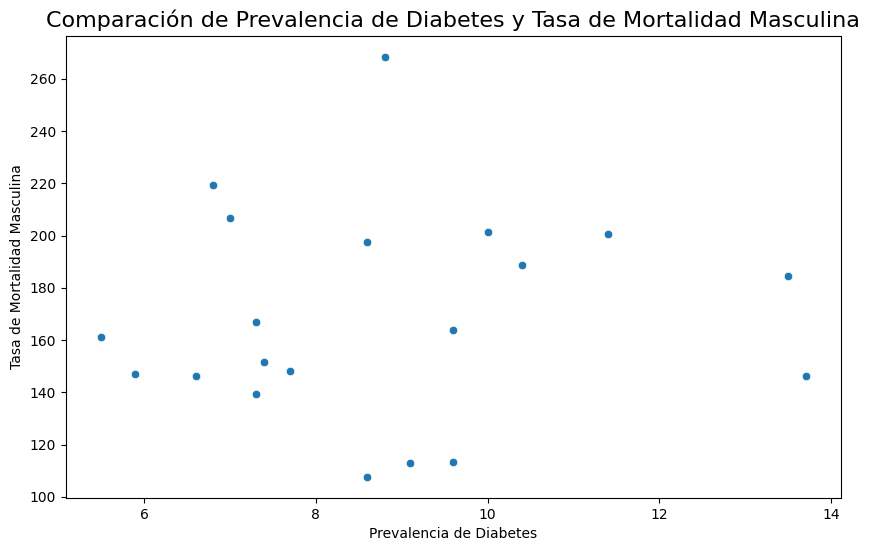

In [71]:
# Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diabetes_prevalence', y='adult_male_mortality_rate', data=df)
plt.title('Comparación de Prevalencia de Diabetes y Tasa de Mortalidad Masculina', fontsize=16)
plt.xlabel('Prevalencia de Diabetes')
plt.ylabel('Tasa de Mortalidad Masculina')
plt.show()

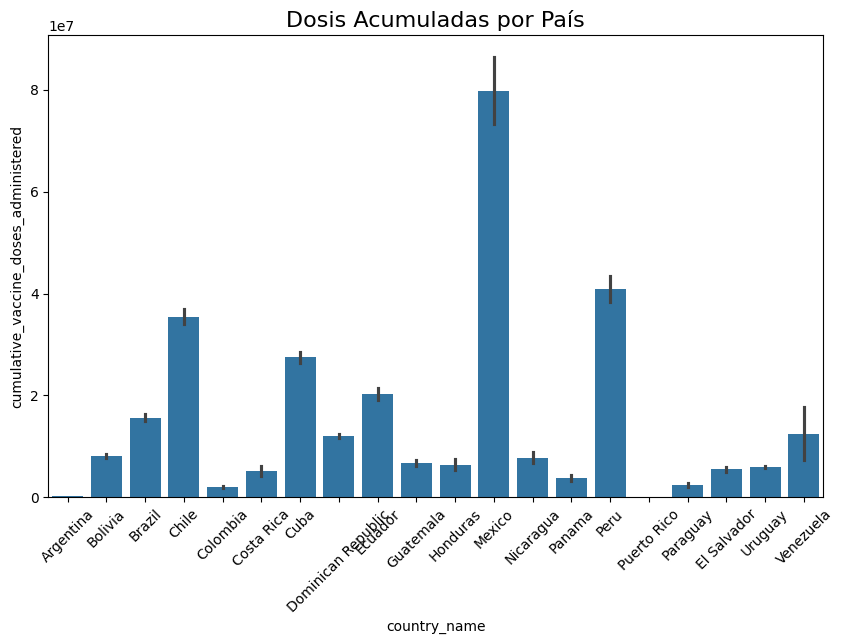

In [72]:
# Gráfico de barras de dosis acumuladas por país
plt.figure(figsize=(10, 6))
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=df)
plt.title('Dosis Acumuladas por País', fontsize=16)
plt.xticks(rotation=45)
plt.show()


C:\Users\usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


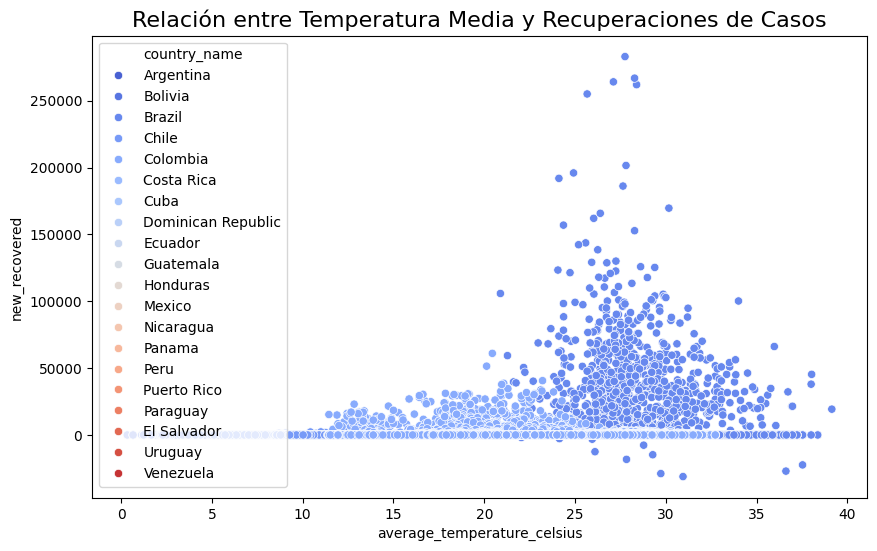

In [73]:
# Diagrama de dispersión: Recuperaciones de casos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_recovered', data=df, hue='country_name', palette='coolwarm')
plt.title('Relación entre Temperatura Media y Recuperaciones de Casos', fontsize=16)
plt.show()


In [129]:
"""df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Muertes por mes de cada país
monthly_deaths = df.groupby(['month', 'country_name'])['new_deceased'].sum().unstack()
monthly_deaths.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Muertes por Mes de Cada País', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Muertes')
plt.xticks(rotation=0)
plt.show()

# Casos confirmados por mes de cada país
monthly_cases = df.groupby(['month', 'country_name'])['new_confirmed'].sum().unstack()
monthly_cases.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Casos Confirmados por Mes de Cada País', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=0)
plt.show()"""


"df['date'] = pd.to_datetime(df['date'])\ndf['month'] = df['date'].dt.month\n\n# Muertes por mes de cada país\nmonthly_deaths = df.groupby(['month', 'country_name'])['new_deceased'].sum().unstack()\nmonthly_deaths.plot(kind='bar', stacked=True, figsize=(12, 6))\nplt.title('Muertes por Mes de Cada País', fontsize=16)\nplt.xlabel('Mes')\nplt.ylabel('Muertes')\nplt.xticks(rotation=0)\nplt.show()\n\n# Casos confirmados por mes de cada país\nmonthly_cases = df.groupby(['month', 'country_name'])['new_confirmed'].sum().unstack()\nmonthly_cases.plot(kind='bar', stacked=True, figsize=(12, 6))\nplt.title('Casos Confirmados por Mes de Cada País', fontsize=16)\nplt.xlabel('Mes')\nplt.ylabel('Casos Confirmados')\nplt.xticks(rotation=0)\nplt.show()"

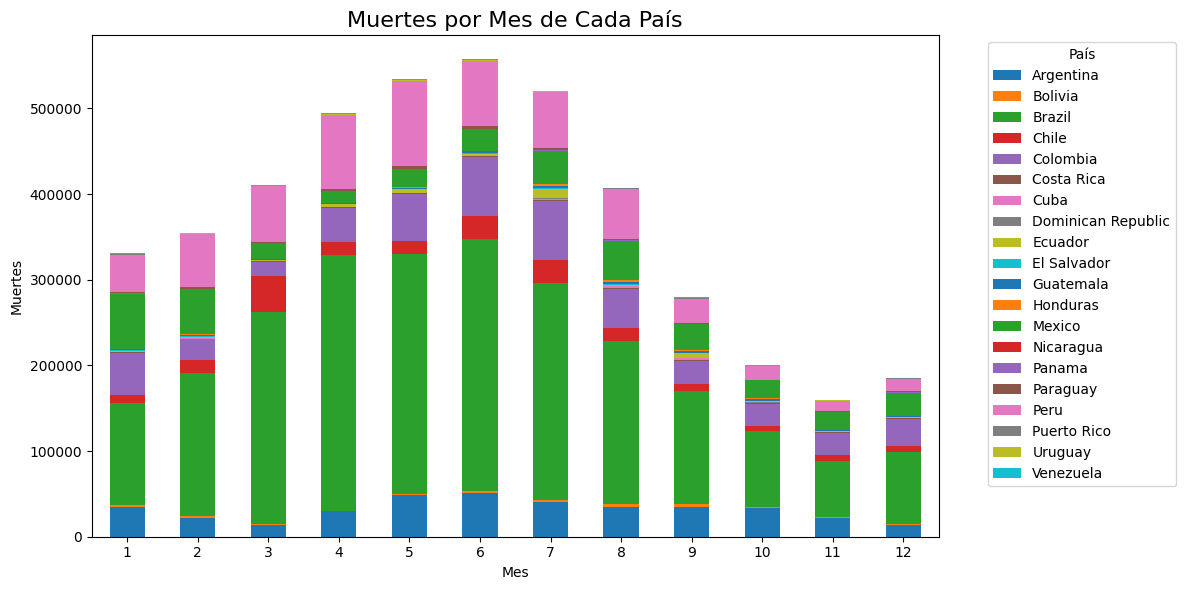

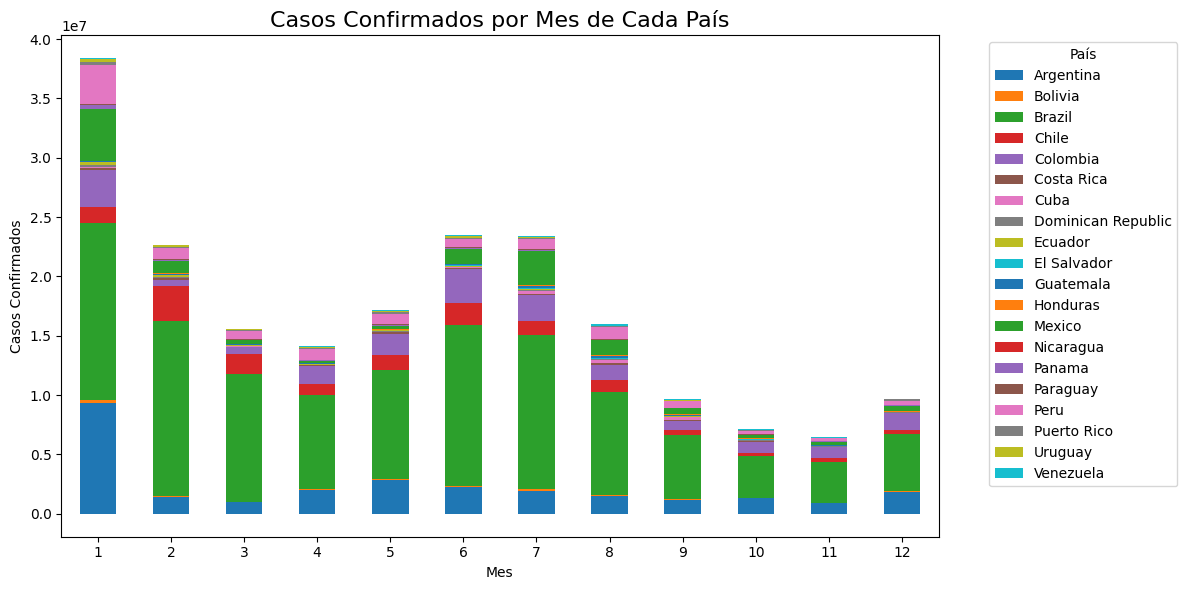

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df ya está definido y contiene los datos necesarios.

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Muertes por mes de cada país
monthly_deaths = df.groupby(['month', 'country_name'])['new_deceased'].sum().unstack()
colors = plt.cm.tab10.colors  # Colores de la paleta tab10 de matplotlib

# Graficar muertes
ax = monthly_deaths.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Muertes por Mes de Cada País', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Muertes')
plt.xticks(rotation=0)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Casos confirmados por mes de cada país
monthly_cases = df.groupby(['month', 'country_name'])['new_confirmed'].sum().unstack()

# Graficar casos confirmados
ax = monthly_cases.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Casos Confirmados por Mes de Cada País', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=0)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


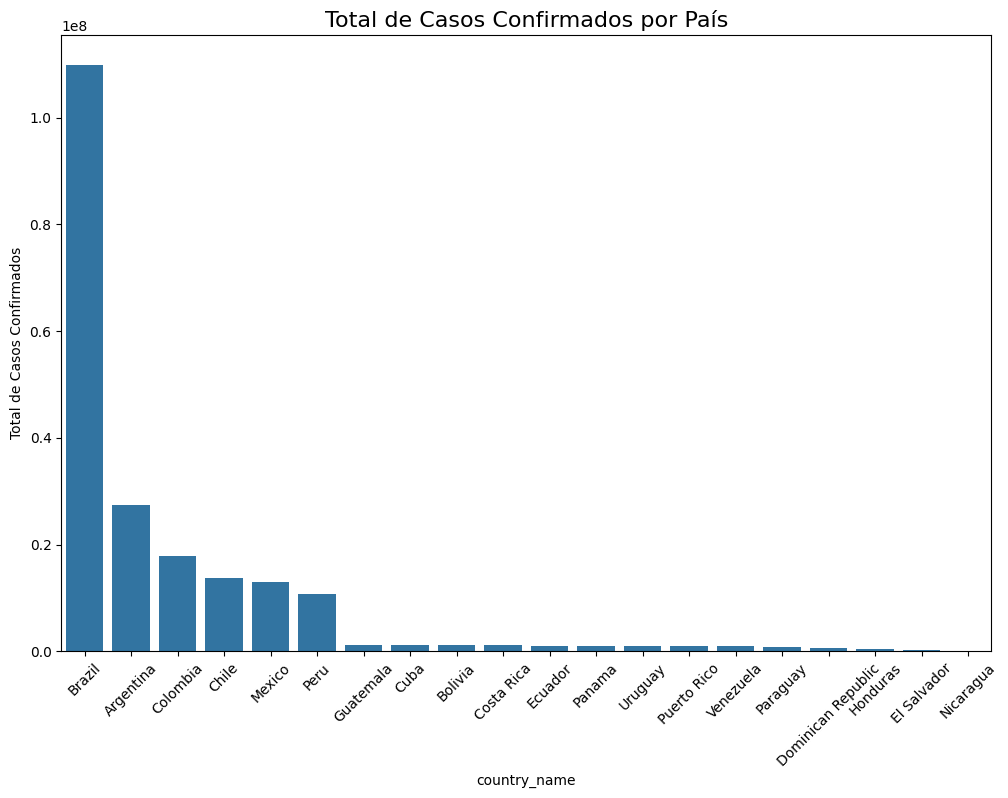

In [75]:
# Agrupar datos por país y sumar los casos confirmados
country_cases = df.groupby('country_name')['new_confirmed'].sum().reset_index()

# Ordenar los países por casos confirmados
country_cases = country_cases.sort_values(by='new_confirmed', ascending=False)

# Gráfico de barras para comparar casos confirmados entre países
plt.figure(figsize=(12, 8))
sns.barplot(x='country_name', y='new_confirmed', data=country_cases)
plt.title('Total de Casos Confirmados por País', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total de Casos Confirmados')
plt.show()


## Avance 3 EDA con Numpy y Pandas

Funcion plt.plot (grafico de lineas): Agrupacion de datos por semana-año & mes-año para analizar la evolución semanal & anual de Casos Nuevos de COVID-19

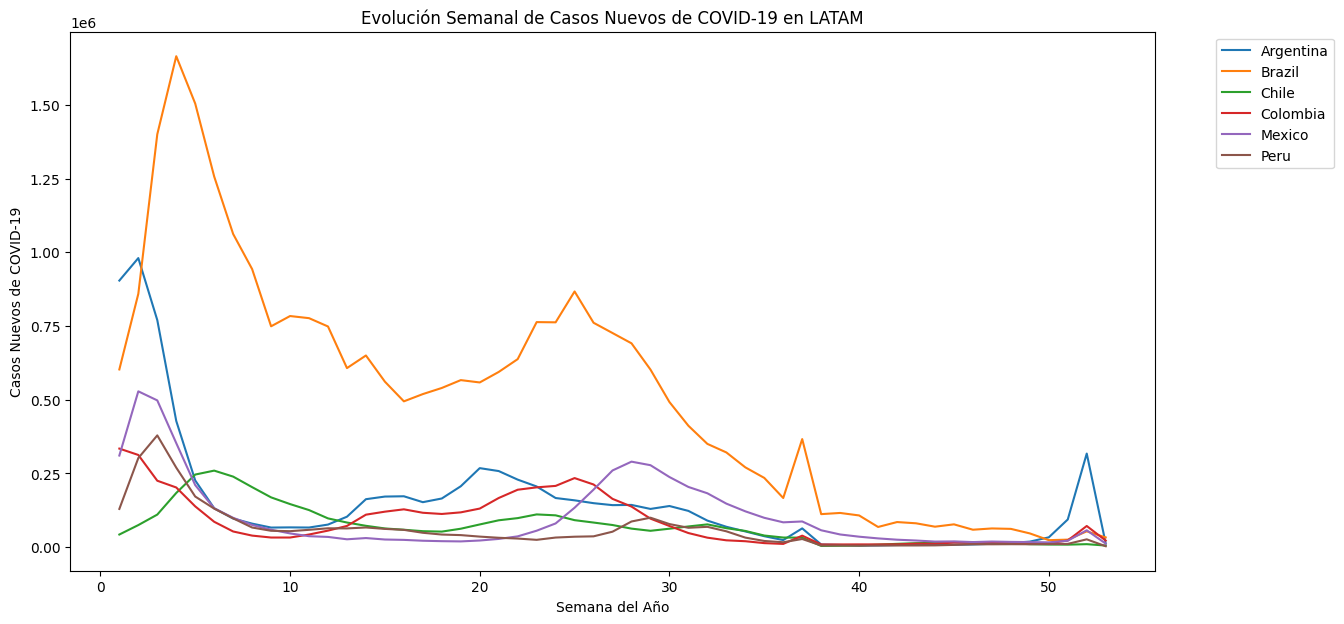

In [76]:
# Agrupamos los datos por semana y año para analizar la evolución semanal de los casos en LATAM.
localizacion_paises['week'] = localizacion_paises.index.isocalendar().week
localizacion_paises['year'] = localizacion_paises.index.isocalendar().year

# Agrupación por semana y suma de casos nuevos por país
weekly_cases = localizacion_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

# Visualización de la evolución semanal de casos nuevos por país
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():  # Corrección de typo 'contry'
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)
plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en LATAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

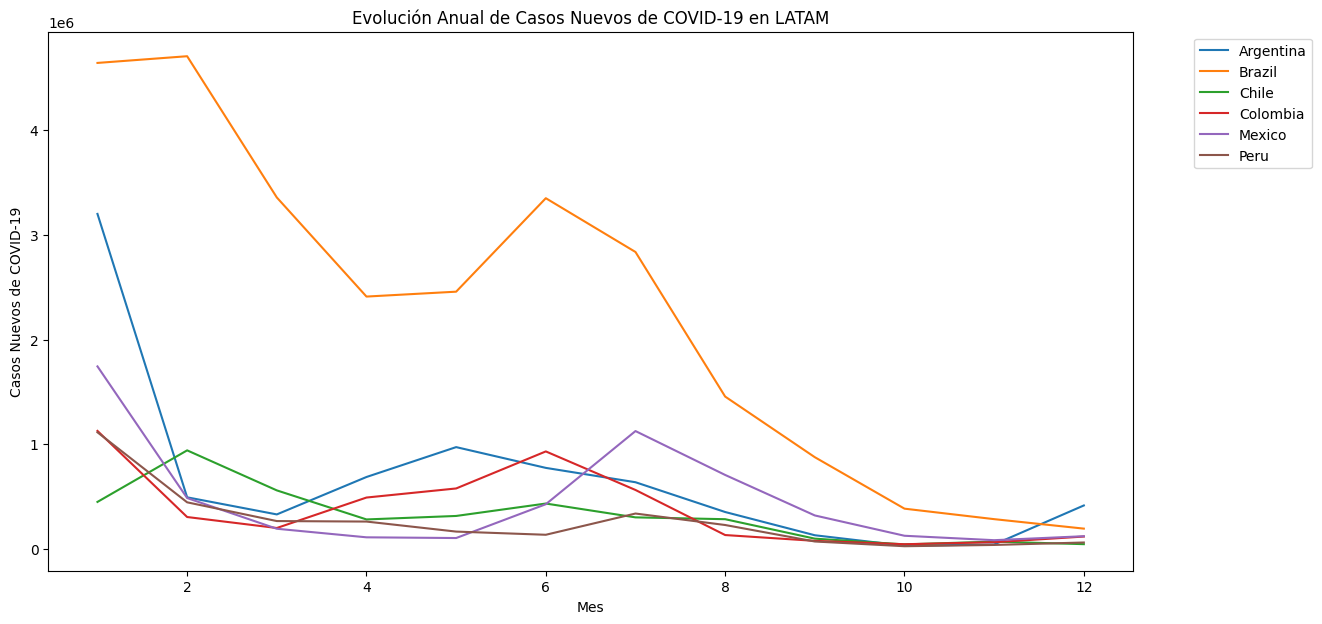

In [77]:
# Ahora agrupamos los datos por mes para analizar la evolución anual de casos.
localizacion_paises['month'] = localizacion_paises.index.month

# Agrupación por mes y suma de casos nuevos por país
yearly_cases = localizacion_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Visualización de la evolución anual de casos nuevos por país
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():  # Corrección de typo
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en LATAM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [78]:
 """
La primera gráfica muestra la evolución de casos nuevos de COVID-19 con dos enfoques: semanal y mensual.

Enfoque semanal: Se observa el número de casos nuevos distribuidos por semanas del año (de la semana 1 a la 52).
Enfoque mensual: Se agrupan los datos por meses, lo que permite comparar patrones entre años. Por ejemplo, los datos de enero de diferentes años (2021 y 2022) se agrupan para visualizar tendencias estacionales.
Este análisis facilita la identificación de picos recurrentes. Se observa que en enero suele haber un incremento en los casos, mientras que hacia la mitad del año hay otro pico significativo. Los meses en los que hay menos actividad, como aquellos sin vacaciones ni viajes, suelen mostrar una caída en los casos. Se muestra un pico en las fechas finales. Estas observaciones ayudan a entender los patrones anuales y las variaciones estacionales en la evolución de los casos nuevos.
 
#resumen se puede observar que la cantidad de casos confirmados y muestes ha ido disminuyendo, sin embargo la cantidad de casos y muertes sigue siendo alta, ademas se nota un pico en las fechas finales.

 """

'\nLa primera gráfica muestra la evolución de casos nuevos de COVID-19 con dos enfoques: semanal y mensual.\n\nEnfoque semanal: Se observa el número de casos nuevos distribuidos por semanas del año (de la semana 1 a la 52).\nEnfoque mensual: Se agrupan los datos por meses, lo que permite comparar patrones entre años. Por ejemplo, los datos de enero de diferentes años (2021 y 2022) se agrupan para visualizar tendencias estacionales.\nEste análisis facilita la identificación de picos recurrentes. Se observa que en enero suele haber un incremento en los casos, mientras que hacia la mitad del año hay otro pico significativo. Los meses en los que hay menos actividad, como aquellos sin vacaciones ni viajes, suelen mostrar una caída en los casos. Se muestra un pico en las fechas finales. Estas observaciones ayudan a entender los patrones anuales y las variaciones estacionales en la evolución de los casos nuevos.\n\n#resumen se puede observar que la cantidad de casos confirmados y muestes ha i

Bar Plot: dosis máximas de vacunas administradas por país.

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\1370697442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vaccination_data.values, y=vaccination_data.index, palette='viridis')


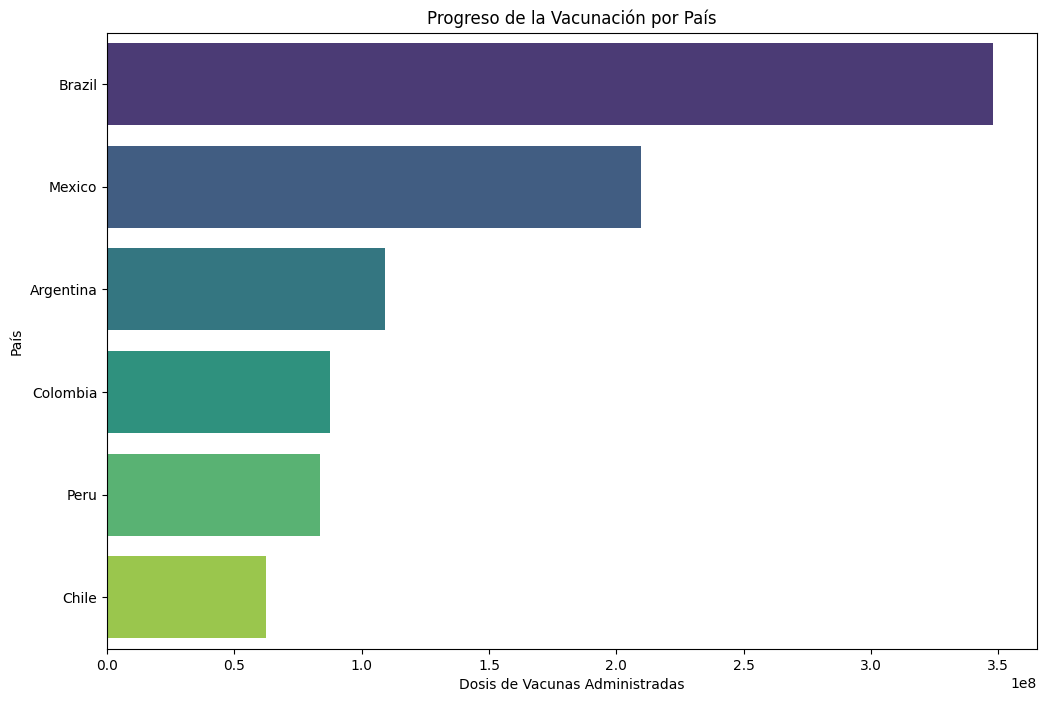

In [79]:
# Progreso de la vacunación por país
vaccination_data = localizacion_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de Vacunas Administradas')
plt.ylabel('País')
plt.title('Progreso de la Vacunación por País')
plt.show()

In [80]:
""" La información se agrupa por país y se visualiza el valor más alto acumulado para cada uno. Los países se organizan en orden descendente, de mayor a menor dosis administradas."""

' La información se agrupa por país y se visualiza el valor más alto acumulado para cada uno. Los países se organizan en orden descendente, de mayor a menor dosis administradas.'

Twin X: relación entre nuevos casos de COVID-19 y la temperatura promedio. 

In [81]:
# Al tener dos ejes y, cada uno con su propia escala, el gráfico puede mostrar claramente cómo se comparan o se relacionan las dos variables a lo largo del tiempo, sin que los rangos de una variable distorsionen la visualización de la otra.

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\431895488.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = localizacion_paises.resample('M').mean(numeric_only=True)


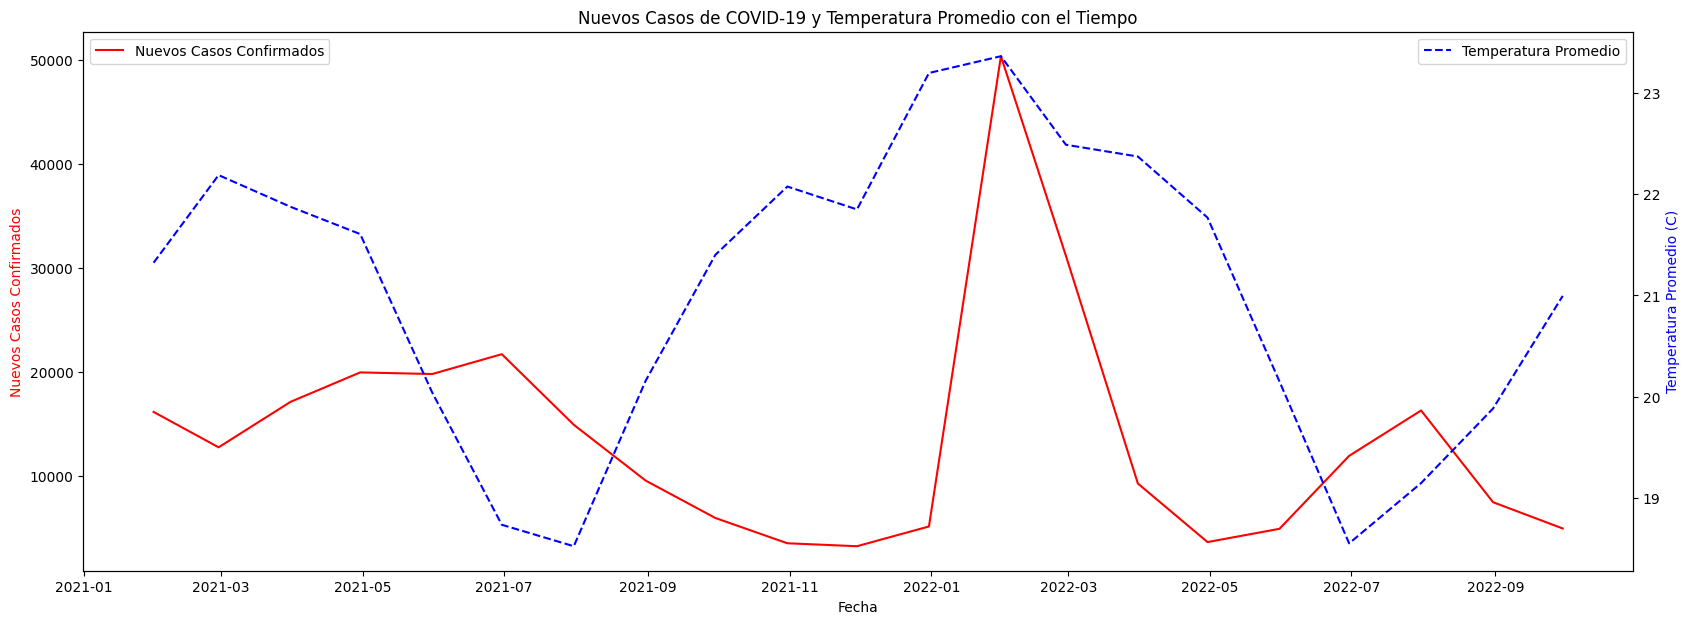

In [82]:
# Relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19
plt.figure(figsize=(20, 7))
ax1 = plt.gca() #gca: 'get current axis'
ax2 = ax1.twinx()

# Resampling de los datos mensualmente, usando 'M' para meses
monthly_data = localizacion_paises.resample('M').mean(numeric_only=True)

# Gráfico de casos confirmados
ax1.plot(monthly_data.index, monthly_data['new_confirmed'], color='red', label='Nuevos Casos Confirmados')

# Gráfico de temperatura promedio, usando '--' para un estilo de línea discontinua
ax2.plot(monthly_data.index, monthly_data['average_temperature_celsius'], color='blue', label='Temperatura Promedio', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos Casos Confirmados', color='red')
ax2.set_ylabel('Temperatura Promedio (C)', color='blue')
plt.title('Nuevos Casos de COVID-19 y Temperatura Promedio con el Tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [83]:
"""
Se observa que los picos en los nuevos casos confirmados coinciden con picos en las temperaturas promedio, lo que indica una posible correlación entre el aumento de casos y el incremento de temperatura. Sin embargo, podemos notar que la temperatura promedio ha ido aumentando mientras que los casos confirmados han ido disminuyendo. Aunque hubo un pico antes del mes de marzo, este disminuyó rápidamente, lo que podría deberse a la cantidad de vacunas administradas o al número de personas que han sido vacunadas. También se sugiere que cuando la temperatura disminuye, los casos confirmados tienden a bajar, indicando una relación inversa."""

'\nSe observa que los picos en los nuevos casos confirmados coinciden con picos en las temperaturas promedio, lo que indica una posible correlación entre el aumento de casos y el incremento de temperatura. Sin embargo, podemos notar que la temperatura promedio ha ido aumentando mientras que los casos confirmados han ido disminuyendo. Aunque hubo un pico antes del mes de marzo, este disminuyó rápidamente, lo que podría deberse a la cantidad de vacunas administradas o al número de personas que han sido vacunadas. También se sugiere que cuando la temperatura disminuye, los casos confirmados tienden a bajar, indicando una relación inversa.'

Bar Plot: Cada paus tiene un impacto debido a la urbanizacion y la densidad de poblacion, por lo qye vamos a analizar la densidad de poblacion en cada pais

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3425015787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')


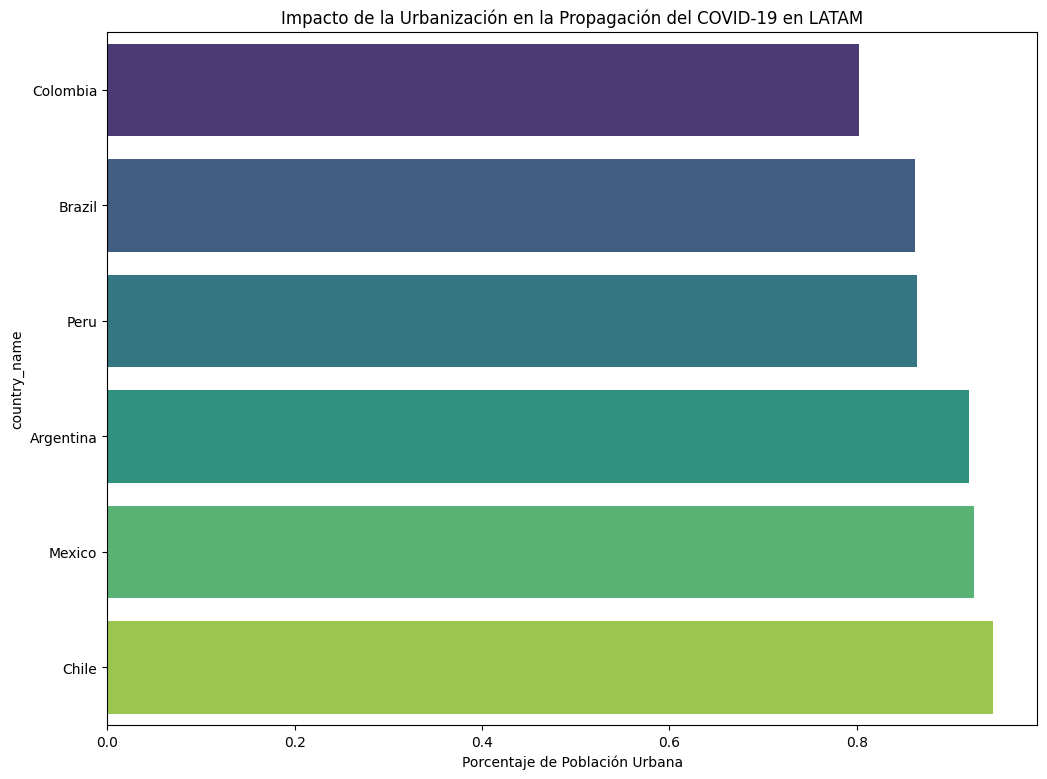

In [84]:
# Análisis del impacto de la urbanización en la propagación del COVID-19
localizacion_paises['urban_population_percentage'] = localizacion_paises['population_urban'] / localizacion_paises['population']

urban_cases = localizacion_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 9))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en LATAM')
plt.show()

In [85]:
"""
En la gráfica se presentan los porcentajes de población urbana por país. Se observa que Chile tiene el mayor porcentaje de población urbana en comparación con Colombia, que tiene el menor porcentaje. El país con mayor impacto en la propagación fue Chile, aunque es extraño, ya que fue uno de los países que mejor manejó la pandemia. Sin embargo, esto puede ser debido a la densidad de población en Chile."""

'\nEn la gráfica se presentan los porcentajes de población urbana por país. Se observa que Chile tiene el mayor porcentaje de población urbana en comparación con Colombia, que tiene el menor porcentaje. El país con mayor impacto en la propagación fue Chile, aunque es extraño, ya que fue uno de los países que mejor manejó la pandemia. Sin embargo, esto puede ser debido a la densidad de población en Chile.'


Bar plot: Densidad de poblacion por grupos de edad

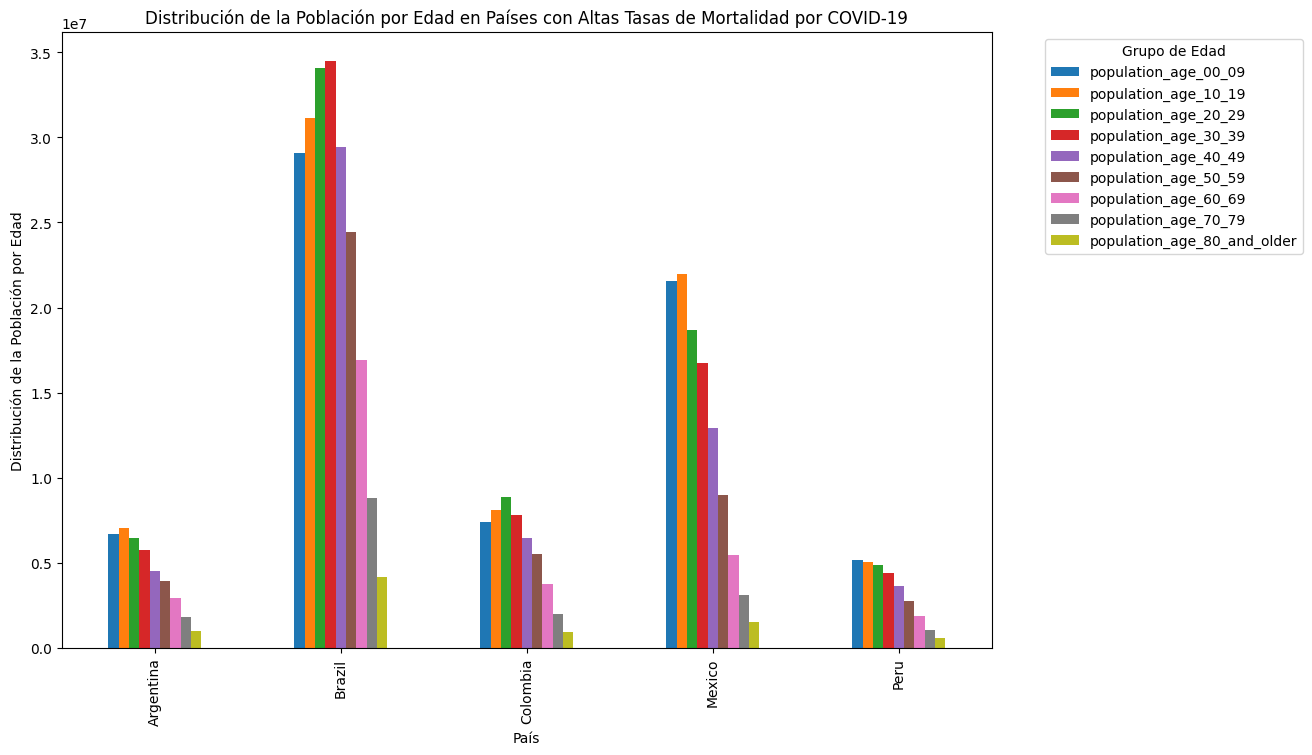

In [86]:
# Distribución de la población por edad en países con altas tasas de mortalidad
high_mortality_countries = localizacion_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index

age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
              'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79',
              'population_age_80_and_older']

age_distribution = localizacion_paises[localizacion_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

# Visualización de la distribución de la población por edad
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()

In [87]:
"""
El gráfico ilustra claramente la desigualdad en la distribución de la población por grupos de edad en los países seleccionados, aunque no ofrece información particularmente reveladora. Sin embargo, es importante considerarlo para análisis futuros. Además, permite comenzar a evaluar la efectividad de las estrategias de vacunación implementadas para mitigar la mortalidad y los casos confirmados."""

'\nEl gráfico ilustra claramente la desigualdad en la distribución de la población por grupos de edad en los países seleccionados, aunque no ofrece información particularmente reveladora. Sin embargo, es importante considerarlo para análisis futuros. Además, permite comenzar a evaluar la efectividad de las estrategias de vacunación implementadas para mitigar la mortalidad y los casos confirmados.'

Bar Plot:  Comparación de estrategias de vacunación: Dosis Administradas (max. acumuladas) x 100 personas


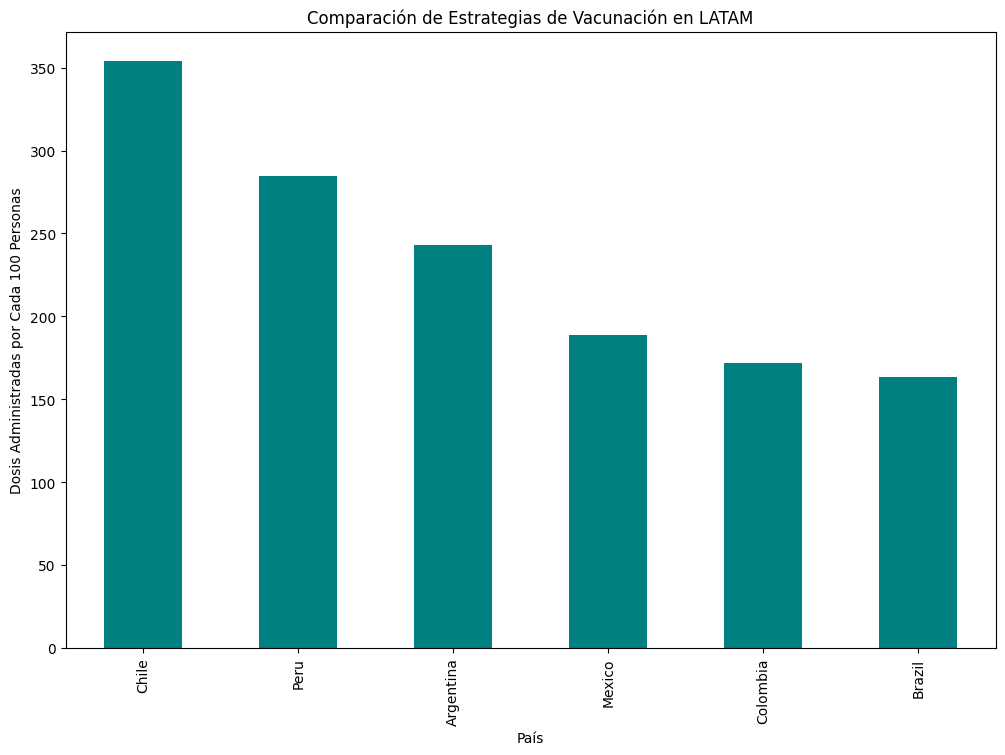

In [88]:
# Comparación de estrategias de vacunación (porcentaje de la población vacunada)
vaccination_strategy = (localizacion_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /
                        localizacion_paises.groupby('country_name')['population'].max()) * 100

# Visualización de las estrategias de vacunación por país
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis Administradas por Cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en LATAM')
plt.show()

In [89]:
""" analisis
La gráfica muestra cómo se han administrado las dosis de vacunas por cada país, expresadas como dosis por cada 100 habitantes. En particular, se observa que en Chile se repartieron 350 dosis por cada 100 habitantes. Esta cifra puede parecer alta debido a que algunas vacunas requieren múltiples dosis, lo que influye en el total administrado. Este análisis es relevante para comprender las estrategias de vacunación implementadas en cada país."""

' analisis\nLa gráfica muestra cómo se han administrado las dosis de vacunas por cada país, expresadas como dosis por cada 100 habitantes. En particular, se observa que en Chile se repartieron 350 dosis por cada 100 habitantes. Esta cifra puede parecer alta debido a que algunas vacunas requieren múltiples dosis, lo que influye en el total administrado. Este análisis es relevante para comprender las estrategias de vacunación implementadas en cada país.'

In [90]:
#Recomendaciones
#Nuevamente vemos el buen resultado de las politicas de Chile y una clara falla en Colombia y Brasil. 
#Con esto vamos definciendo los paises que necesitan mas ayuda y donde se deberia crear los nuevos centros.
#Anteriormente revisamos las diabeter pero seria bueno revisarlo en porcentajes para identificar paises 

Bar plot : Análisis de condiciones preexistentes Diabetes & Tabaquismo

In [91]:
#prueba: seleccionar 5 mas pequenos
localizacion_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

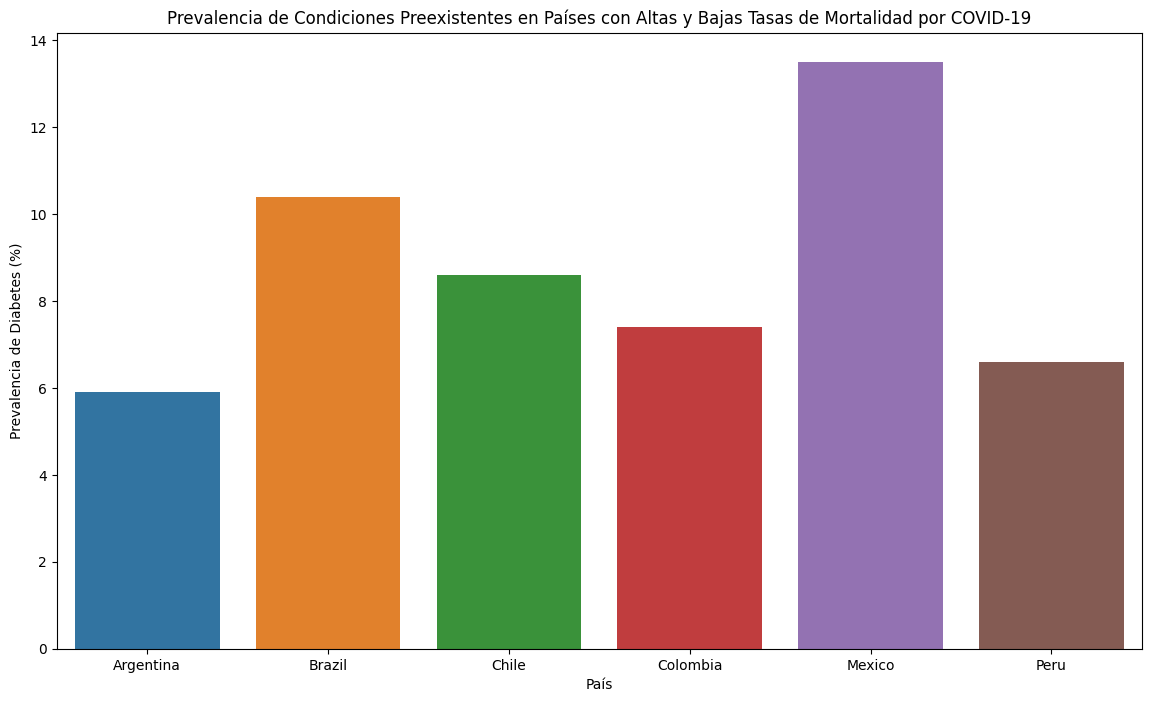

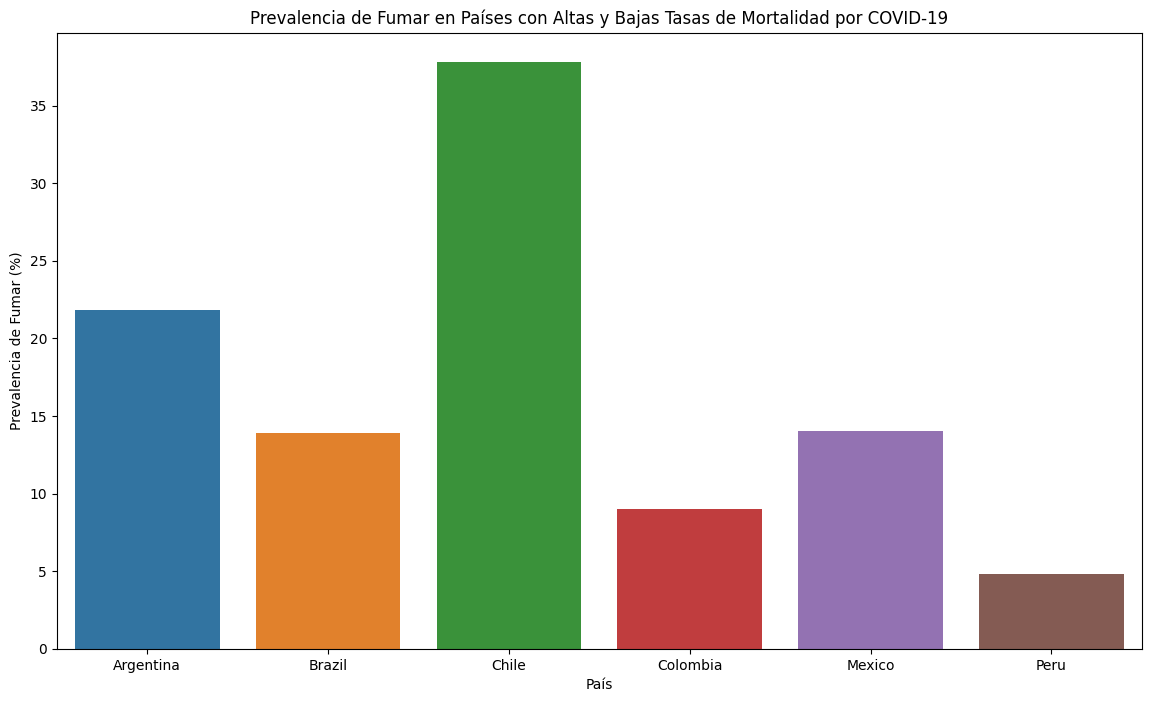

In [92]:
# Análisis de condiciones preexistentes (prevalencia de diabetes)
top_countries = localizacion_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = localizacion_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

condition_data = localizacion_paises[localizacion_paises['country_name'].isin(top_countries.union(bottom_countries))]

# Visualización de la prevalencia de diabetes
plt.figure(figsize=(14, 8))
sns.barplot(data=condition_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Visualización de la prevalencia de fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=condition_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

In [93]:
"""Observamos que la diabetes tiene un impacto significativamente mayor en México y Brasil, lo que indica que estos países han sufrido considerablemente a causa de esta enfermedad. 
El tabaquismo afecta en mayor medida a Chile y Argentina, lo que sugiere que estos países enfrentan serios problemas relacionados con el consumo de tabaco.
"""
#A partir de estos hallazgos, surge la pregunta: ¿cuál ha sido el impacto de la mortalidad por país en relación con estas condiciones?

'Observamos que la diabetes tiene un impacto significativamente mayor en México y Brasil, lo que indica que estos países han sufrido considerablemente a causa de esta enfermedad. \nEl tabaquismo afecta en mayor medida a Chile y Argentina, lo que sugiere que estos países enfrentan serios problemas relacionados con el consumo de tabaco.\n'

Bar plot (pandas): tasa de letalidad por país

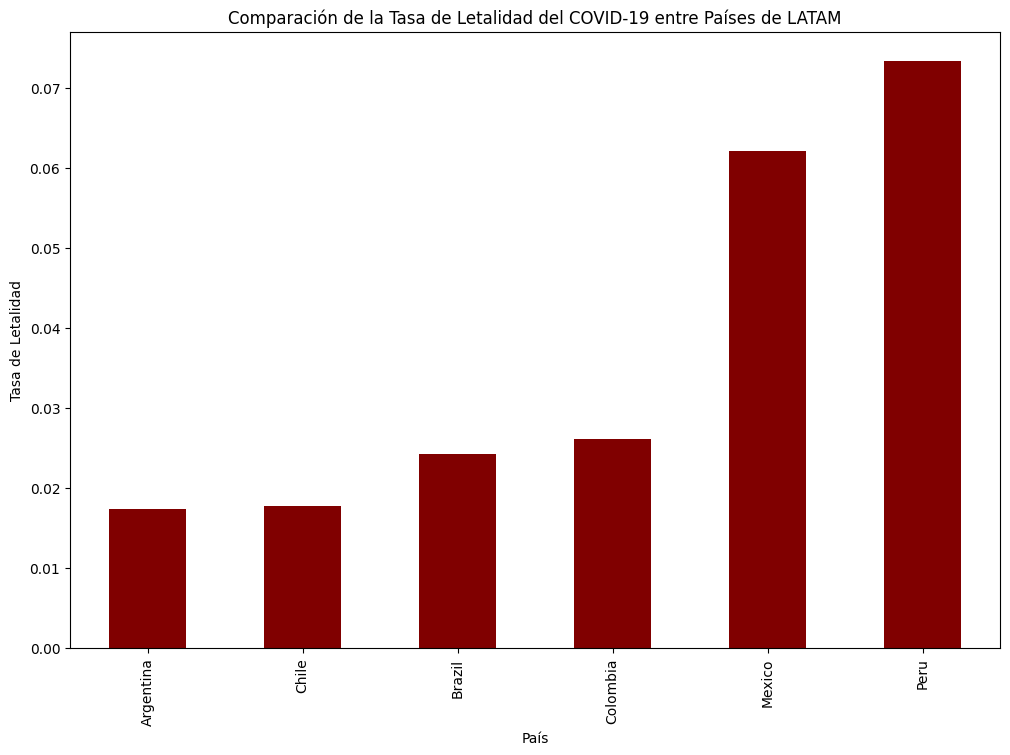

In [94]:
# Calcula la tasa de letalidad por país
localizacion_paises['case_fatality_rate'] = localizacion_paises['cumulative_deceased'] / localizacion_paises['cumulative_confirmed']
fatality_rates = localizacion_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

# Gráfico de barras comparando la tasa de letalidad entre países de LATAM
plt.figure(figsize=(12,8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 entre Países de LATAM')
plt.show()


In [95]:
"""En base a estos datos, podemos observar que la tasa de letalidad varía significativamente entre los países analizados. Brasil y Colombia muestran tasas de letalidad notablemente más altas en comparación con Argentina y Chile, que tienen la misma tasa más baja.

 la tasa de letalidad ha mostrado un comportamiento variable entre los países. Mientras algunos países han implementado campañas de vacunación y medidas de salud pública efectivas que han llevado a una disminución en los nuevos casos y muertes.
"""
# Considera también realizar un análisis temporal para observar cómo las tasas de letalidad han cambiado a lo largo del tiempo y el impacto de las intervenciones de salud pública.

'En base a estos datos, podemos observar que la tasa de letalidad varía significativamente entre los países analizados. Brasil y Colombia muestran tasas de letalidad notablemente más altas en comparación con Argentina y Chile, que tienen la misma tasa más baja.\n\n la tasa de letalidad ha mostrado un comportamiento variable entre los países. Mientras algunos países han implementado campañas de vacunación y medidas de salud pública efectivas que han llevado a una disminución en los nuevos casos y muertes.\n'


Twinx:  Relación entre la cobertura de vacunación y la reducción de casos

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\2153846369.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  localizacion_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\2153846369.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  localizacion_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje Vacunado')


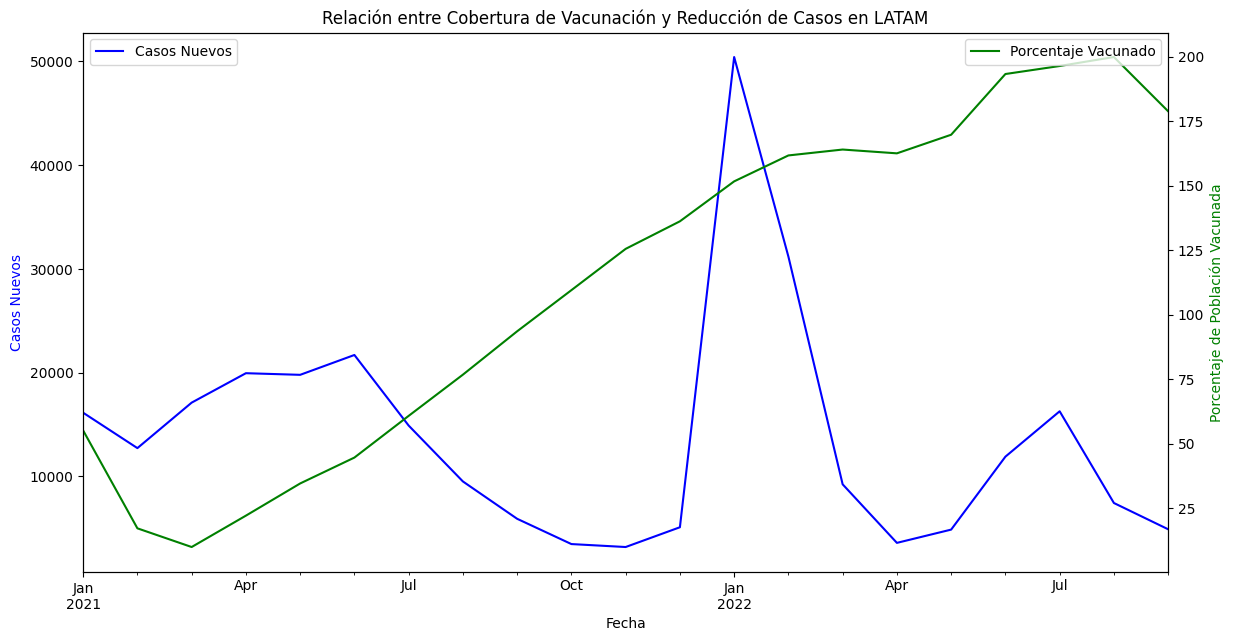

In [96]:
# Relación entre la cobertura de vacunación y la reducción de casos en LATAM
plt.figure(figsize=(14,7))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Calculamos el porcentaje de población vacunada
localizacion_paises['percentage_vaccinated'] = (localizacion_paises['cumulative_vaccine_doses_administered'] / localizacion_paises['population']) * 100

# Gráfica de evolución de casos nuevos vs porcentaje de población vacunada (resampleado por mes)
localizacion_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
localizacion_paises.resample('M').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje Vacunado')

# Configuración de los ejes y título del gráfico
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de Población Vacunada', color='green')
ax1.set_title('Relación entre Cobertura de Vacunación y Reducción de Casos en LATAM')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3193352676.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=localizacion_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


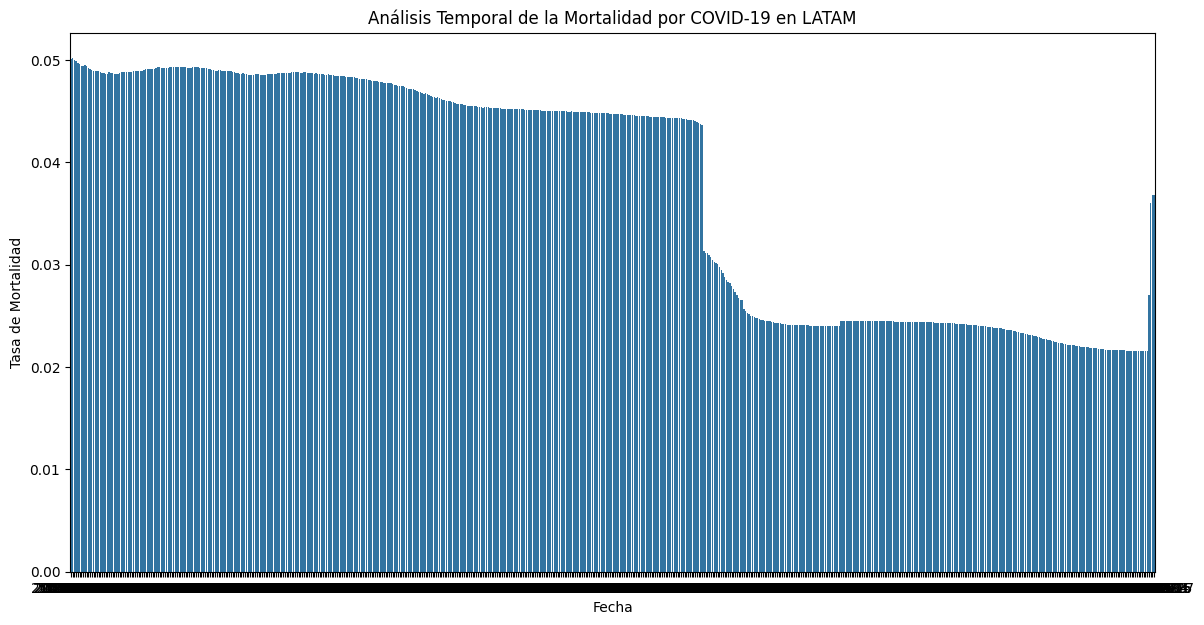

In [97]:
# Evolución temporal de la tasa de mortalidad en LATAM
localizacion_paises['mortality_rate'] = localizacion_paises['cumulative_deceased'] / localizacion_paises['cumulative_confirmed']
plt.figure(figsize=(14,7))
sns.barplot(data=localizacion_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en LATAM')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()


# estimator='mean': Se calcula la media de la tasa de mortalidad para cada fecha, lo que permite observar la tendencia general en el tiempo.
# Confidence Interval(ci)=None: Indica que no se deben mostrar 'intervalos de confianza'(cuán preciso es un estimado basado en una muestra de datos) en el gráfico. Esto puede ser útil si se desea simplificar la visualización.

In [98]:
"""Los casos activos han disminuido y los casos recuperados han aumentado, esto debido a la vacunacion y a las medidas tomadas por los paises."""


'Los casos activos han disminuido y los casos recuperados han aumentado, esto debido a la vacunacion y a las medidas tomadas por los paises.'

Line Plot: Como evolucionan los casos activos y recuperados en LATAM?


C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3653854307.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=localizacion_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
C:\Users\usuario\AppData\Local\Temp\ipykernel_17916\3653854307.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=localizacion_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')


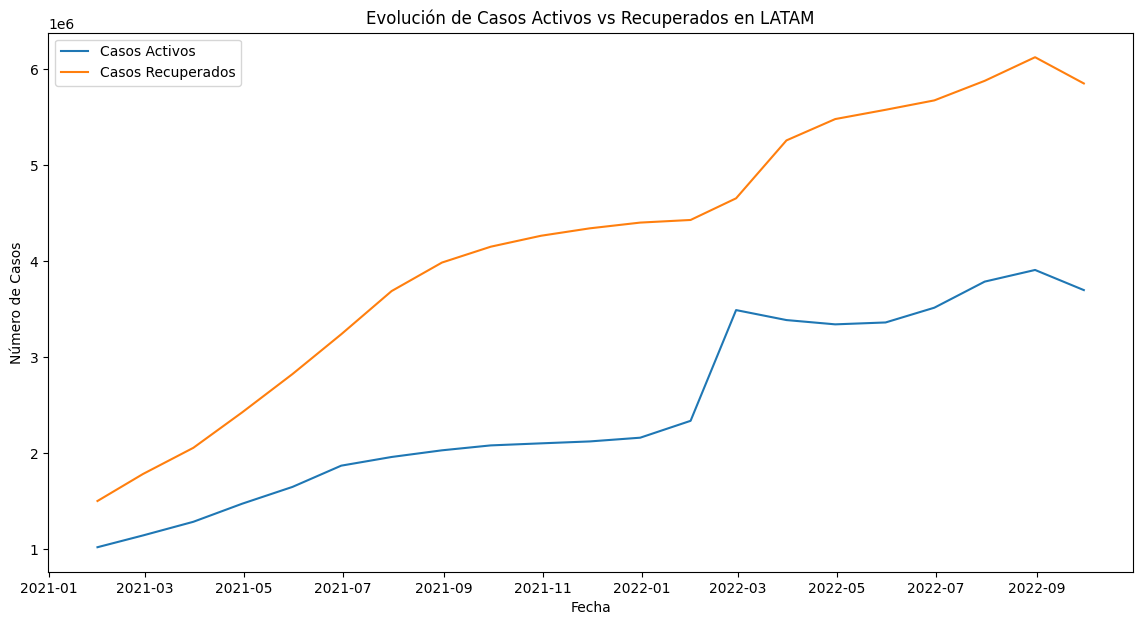

In [99]:
# Evolución de casos activos vs recuperados en LATAM
localizacion_paises['active_cases'] = localizacion_paises['cumulative_confirmed'] - localizacion_paises['cumulative_deceased'] - localizacion_paises['cumulative_recovered']
plt.figure(figsize=(14,7))

# Gráfico de la evolución de casos activos y recuperados (resampleado por mes)
sns.lineplot(data=localizacion_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=localizacion_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs Recuperados en LATAM')
plt.legend()
plt.show()

In [100]:
"""Casos activos y recuperados van en ascenso"""

'Casos activos y recuperados van en ascenso'

Bar plot:  Situación actual de los países en cuanto a COVID-19

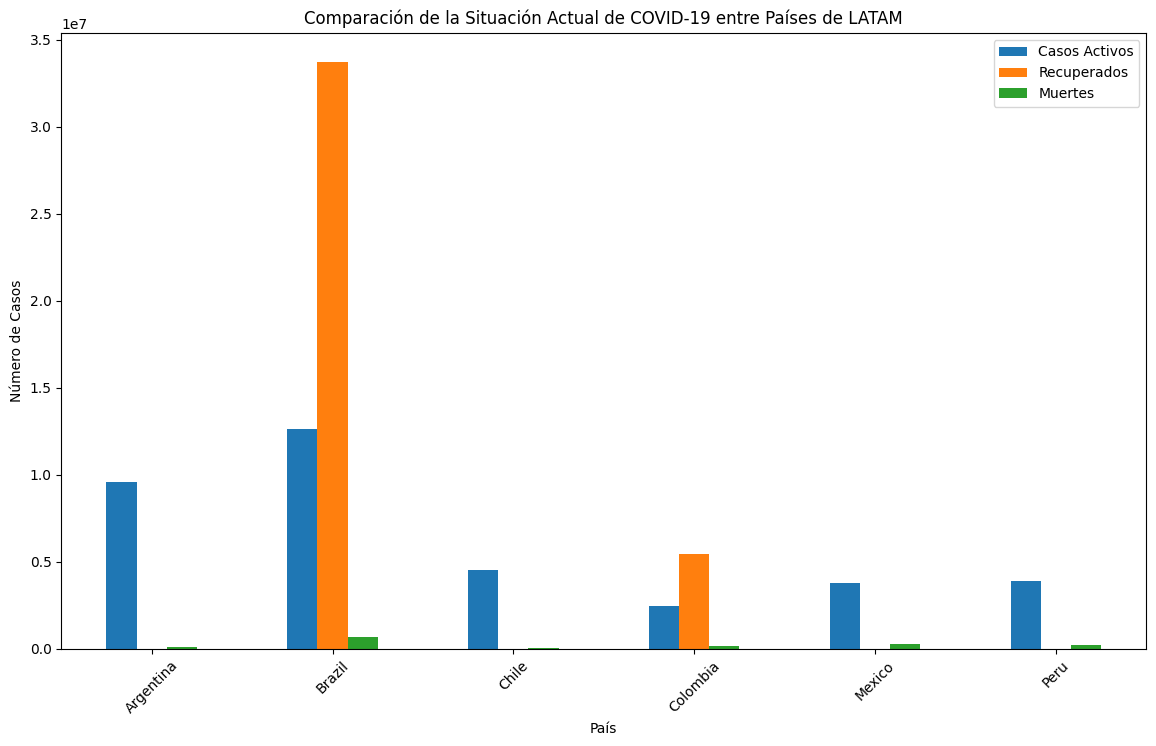

In [101]:
# Situación actual de los países en cuanto a COVID-19
current_situation = localizacion_paises.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14,8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de LATAM')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

#se puede excluir repuerados para tener un mejor analiss

In [102]:
"""
los países donde la empresa farmacéutica debería considerar expandirse son Brasil, México y Colombia. Estos países han registrado el mayor número de casos confirmados y muertes, además de haber administrado una cantidad insuficiente de vacunas. Es posible que las políticas de vacunación no hayan sido las más efectivas o que no se haya contado con la cantidad de vacunas necesarias. Sin embargo, es importante considerar también la densidad de población, la cantidad de habitantes de cada país y los problemas sociales que podrían influir en el número de casos confirmados y muertes."""

'\nlos países donde la empresa farmacéutica debería considerar expandirse son Brasil, México y Colombia. Estos países han registrado el mayor número de casos confirmados y muertes, además de haber administrado una cantidad insuficiente de vacunas. Es posible que las políticas de vacunación no hayan sido las más efectivas o que no se haya contado con la cantidad de vacunas necesarias. Sin embargo, es importante considerar también la densidad de población, la cantidad de habitantes de cada país y los problemas sociales que podrían influir en el número de casos confirmados y muertes.'

EXTRA CREDIT

1. Crear el Mapa de Calor con Folium

In [112]:
import folium
from folium.plugins import HeatMap

In [118]:
# Filtrar las columnas necesarias y eliminar valores nulos
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = localizacion_paises[columns].dropna()

# Crear el mapa centrado en LATAM
mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']].values, radius=15)
mapa.add_child(heat_map_confirmed)

# Mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']].values, radius=15)
mapa.add_child(heat_map_deceased)

# Mapa de calor para las vacunas administradas
heat_map_vaccinate = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']].values, radius=15)
mapa.add_child(heat_map_vaccinate)

# Mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']].values, radius=15)
mapa.add_child(heat_map_recovered)

# Guardar el mapa como un archivo HTML
mapa.save('mapa.html')

mapa


In [ ]:
"""Las gráficas anteriores no proporcionan un nivel de detalle adecuado. Por lo tanto, llevaremos a cabo un análisis más exhaustivo de las dosis administradas y de los casos confirmados, utilizando gráficos más simples y directos. Además, mantendremos los mapas para complementar la información presentada."""

Análisis Geoespacial con geopandas

In [105]:
import geopandas as gpd
import matplotlib.pyplot as plt

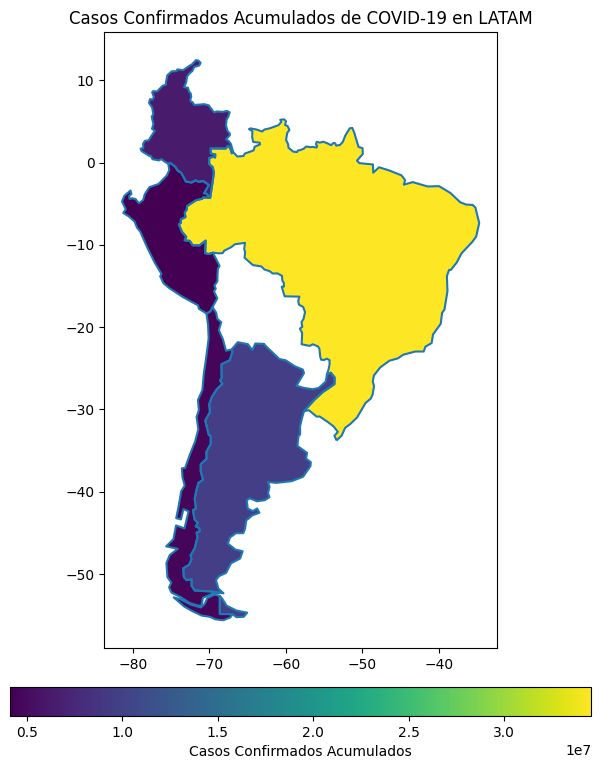

In [123]:
# Cargar el archivo shapefile
world = gpd.read_file(r'C:\Users\usuario\Documents\proyecto_m4\natural_earth\ne_110m_admin_0_countries.shp')

# Filtrar países de LATAM usando la columna 'ADMIN'
latam_countries = ['Argentina', 'Chile', 'Colombia', 'Peru', 'Brazil']
world = world[world['ADMIN'].isin(latam_countries)]

# Renombrar columna para unir con el DataFrame
world = world.rename(columns={"ADMIN": "country_name"})

# Merge con los datos de localización de países y casos confirmados
world = world.merge(localizacion_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")

# Mapa de casos confirmados por país
fig, ax = plt.subplots(1, 1, figsize=(15,10))
world.boundary.plot(ax=ax)  # Dibujar los límites del mapa
world.plot(column='cumulative_confirmed', ax=ax, legend=True, 
           legend_kwds={'label': "Casos Confirmados Acumulados",
                        'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos Confirmados Acumulados de COVID-19 en LATAM')
plt.show()
